# 1. Data preprocessing

In [111]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.utils import resample
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import RandomOverSampler
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score
from imblearn.over_sampling import SMOTE, RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier


In [4]:
df = pd.read_csv('/Users/manhth1nh/iCloud Drive (Archive)/Desktop/University/Machine-learning - midterm/UCI_Credit_Card.csv')


In [5]:
df

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000.0,1,3,1,39,0,0,0,0,...,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0
29996,29997,150000.0,1,3,2,43,-1,-1,-1,-1,...,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0
29997,29998,30000.0,1,2,2,37,4,3,2,-1,...,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1
29998,29999,80000.0,1,3,1,41,1,-1,0,0,...,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  float64
 13  BILL_AMT2                   300

In [7]:
df.nunique()

ID                            30000
LIMIT_BAL                        81
SEX                               2
EDUCATION                         7
MARRIAGE                          4
AGE                              56
PAY_0                            11
PAY_2                            11
PAY_3                            11
PAY_4                            11
PAY_5                            10
PAY_6                            10
BILL_AMT1                     22723
BILL_AMT2                     22346
BILL_AMT3                     22026
BILL_AMT4                     21548
BILL_AMT5                     21010
BILL_AMT6                     20604
PAY_AMT1                       7943
PAY_AMT2                       7899
PAY_AMT3                       7518
PAY_AMT4                       6937
PAY_AMT5                       6897
PAY_AMT6                       6939
default.payment.next.month        2
dtype: int64

In [8]:
# Rename PAY_0 for consistency
df = df.rename(columns={'PAY_0':'PAY_1'})
print(f'Tên của các cột :', list(df.columns))

Tên của các cột : ['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'default.payment.next.month']


In [9]:
df = df.drop(columns = 'ID')

In [10]:
df["MARRIAGE"] = df["MARRIAGE"].replace({0:3})
df["MARRIAGE"].value_counts(normalize=True)

MARRIAGE
2    0.532133
1    0.455300
3    0.012567
Name: proportion, dtype: float64

In [11]:
df['AGE'].unique()

array([24, 26, 34, 37, 57, 29, 23, 28, 35, 51, 41, 30, 49, 39, 40, 27, 47,
       33, 32, 54, 58, 22, 25, 31, 46, 42, 43, 45, 56, 44, 53, 38, 63, 36,
       52, 48, 55, 60, 50, 75, 61, 73, 59, 21, 67, 66, 62, 70, 72, 64, 65,
       71, 69, 68, 79, 74])

Chia các khoảng độ tuổi trong dataset

In [12]:
df['Age_group']=pd.cut(df['AGE'],[18,34,44,64,79],labels=['18-34','35-44','45-64','>64'])

In [13]:
df['Age_group'].unique()

['18-34', '35-44', '45-64', '>64']
Categories (4, object): ['18-34' < '35-44' < '45-64' < '>64']

In [14]:
df['Age_group'].head()

0    18-34
1    18-34
2    18-34
3    35-44
4    45-64
Name: Age_group, dtype: category
Categories (4, object): ['18-34' < '35-44' < '45-64' < '>64']

In [15]:
df=df.rename(columns={'default.payment.next.month':'default'})

In [16]:
df['Limit Balance'] = pd.cut(df['LIMIT_BAL'],[5000, 50000, 100000, 150000, 200000, 300000, 400000, 500000, 1100000],labels=(['(5000, 50000]', '(50000, 100000]', '(100000, 150000]', '(150000, 200000]',
                '(200000, 300000]', '(300000, 400000]', '(400000, 500000]', '(500000, 1100000']))

In [17]:
df['Limit Balance'].unique()

['(5000, 50000]', '(100000, 150000]', '(50000, 100000]', '(400000, 500000]', '(150000, 200000]', '(200000, 300000]', '(500000, 1100000', '(300000, 400000]']
Categories (8, object): ['(5000, 50000]' < '(50000, 100000]' < '(100000, 150000]' < '(150000, 200000]' < '(200000, 300000]' < '(300000, 400000]' < '(400000, 500000]' < '(500000, 1100000']

In [18]:
# EDUCATION: (1 = graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown, 0=unknown)
print('Distribution "EDUCATION": 1 = Graduate school, 2  = University, 3 = High school, 4 = Others, 5 = Unknown, 6 = Unknown, 0 = Unknown')
print(df['EDUCATION'].unique())
df['EDUCATION'].value_counts()

Distribution "EDUCATION": 1 = Graduate school, 2  = University, 3 = High school, 4 = Others, 5 = Unknown, 6 = Unknown, 0 = Unknown
[2 1 3 5 4 6 0]


EDUCATION
2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: count, dtype: int64

In [19]:
# Change 0, 5, 6 to 4, equal to Others
# 1 = Graduate school, 2 = University, 3 = High school, 4 = Others
print('Distribution of EDUCATION: 1 = Graduate school, 2 = University, 3 = High school, 4 = Others')
df["EDUCATION"] = df["EDUCATION"].replace({0:4,5:4,6:4})
df["EDUCATION"].value_counts()

Distribution of EDUCATION: 1 = Graduate school, 2 = University, 3 = High school, 4 = Others


EDUCATION
2    14030
1    10585
3     4917
4      468
Name: count, dtype: int64

In [20]:
# Maritage status: (1 = Married, 2 = Single, 3 = Others)
print('Distribution of "MARRIAGE: 1 = Married, 2 = Single, 3 = Others')
print(df['MARRIAGE'].unique())
df['MARRIAGE'].value_counts()

Distribution of "MARRIAGE: 1 = Married, 2 = Single, 3 = Others
[1 2 3]


MARRIAGE
2    15964
1    13659
3      377
Name: count, dtype: int64

In [21]:
df["MARRIAGE"] = df["MARRIAGE"].replace({0:3})
df["MARRIAGE"].value_counts(normalize=True)

MARRIAGE
2    0.532133
1    0.455300
3    0.012567
Name: proportion, dtype: float64

### Handling outliers
Việc xử lý giá trị ngoại lai cho tất cả các cột BILL_AMT và PAY_AMT cùng lúc sẽ ảnh hưởng khá lớn đến dataset, vì:

- Số lượng cột lớn: Các cột BILL_AMT1-6 và PAY_AMT1-6 là 12 cột, chiếm phần lớn dữ liệu về các khoản thanh toán và hóa đơn. Việc loại bỏ hoặc thay thế các giá trị ngoại lai trên tất cả các cột này có thể làm thay đổi đáng kể bản chất của dữ liệu. Nếu không được thực hiện cẩn thận, có thể gây mất mát thông tin quan trọng hoặc thay đổi cấu trúc dữ liệu thực tế.

- Tính chất của ngoại lai: Ngoại lai ở những cột này có thể không thực sự là "lỗi", mà phản ánh các tình huống bất thường trong chi tiêu tài chính, chẳng hạn như một số khách hàng có khoản thanh toán hoặc số dư hóa đơn rất lớn. Việc loại bỏ những ngoại lệ này có thể làm mất đi tính đa dạng thực tế của dữ liệu.

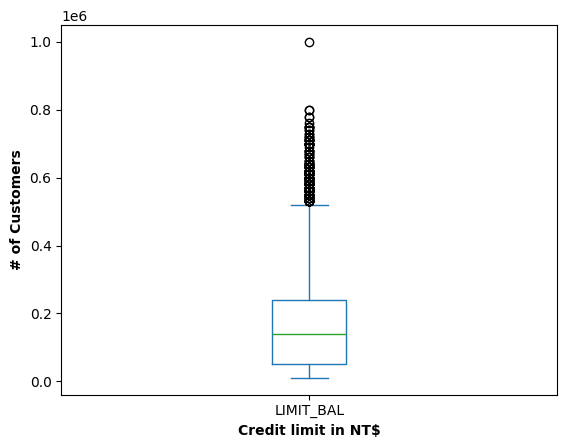

In [22]:
# Indentify the outliers using box plot
df['LIMIT_BAL'].plot(kind = 'box')
plt.xlabel('Credit limit in NT$', fontweight= 'bold')
plt.ylabel('# of Customers', fontweight = 'bold')
plt.show()

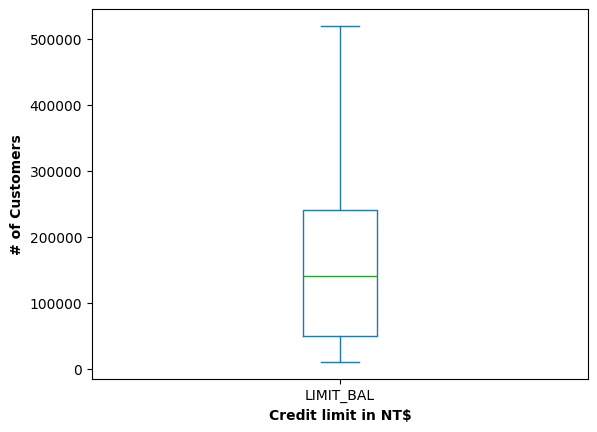

In [23]:
def remove_outlier_using_IQR(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

df = remove_outlier_using_IQR(df, 'LIMIT_BAL')
df['LIMIT_BAL'].plot(kind = 'box')
plt.xlabel('Credit limit in NT$', fontweight= 'bold')
plt.ylabel('# of Customers', fontweight = 'bold')
plt.show()

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 29833 entries, 0 to 29999
Data columns (total 26 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   LIMIT_BAL      29833 non-null  float64 
 1   SEX            29833 non-null  int64   
 2   EDUCATION      29833 non-null  int64   
 3   MARRIAGE       29833 non-null  int64   
 4   AGE            29833 non-null  int64   
 5   PAY_1          29833 non-null  int64   
 6   PAY_2          29833 non-null  int64   
 7   PAY_3          29833 non-null  int64   
 8   PAY_4          29833 non-null  int64   
 9   PAY_5          29833 non-null  int64   
 10  PAY_6          29833 non-null  int64   
 11  BILL_AMT1      29833 non-null  float64 
 12  BILL_AMT2      29833 non-null  float64 
 13  BILL_AMT3      29833 non-null  float64 
 14  BILL_AMT4      29833 non-null  float64 
 15  BILL_AMT5      29833 non-null  float64 
 16  BILL_AMT6      29833 non-null  float64 
 17  PAY_AMT1       29833 non-null  float

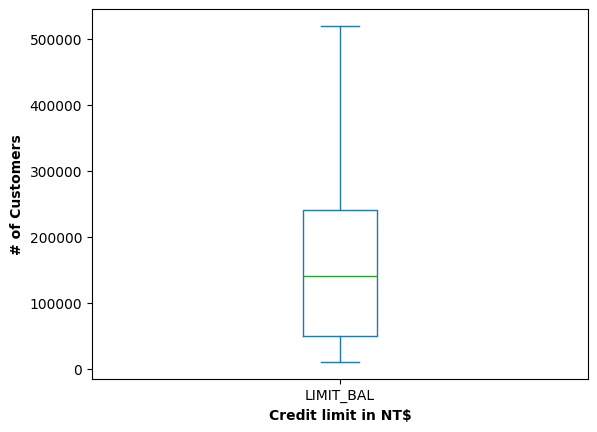

In [25]:
#Build function to remove outliers
def remove_outlier_using_IQR(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return series[(series >= lower_bound) & (series <= upper_bound)]

df['LIMIT_BAL'] = remove_outlier_using_IQR(df['LIMIT_BAL'])
# Check again for the outliers
df['LIMIT_BAL'].plot(kind = 'box')
plt.xlabel('Credit limit in NT$', fontweight= 'bold')
plt.ylabel('# of Customers', fontweight = 'bold')
plt.show()

In [26]:
df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default,Age_group,Limit Balance
0,20000.0,2,2,1,24,2,2,-1,-1,-2,...,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1,18-34,"(5000, 50000]"
1,120000.0,2,2,2,26,-1,2,0,0,0,...,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1,18-34,"(100000, 150000]"
2,90000.0,2,2,2,34,0,0,0,0,0,...,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0,18-34,"(50000, 100000]"
3,50000.0,2,2,1,37,0,0,0,0,0,...,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0,35-44,"(5000, 50000]"
4,50000.0,1,2,1,57,-1,0,-1,0,0,...,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0,45-64,"(5000, 50000]"


In [125]:
X = df.drop(columns=['default'])  # Replace 'target' with your actual target column name
y = df['default']

In [126]:
models = {
    'Logistic Regression': LogisticRegression(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'KNN': KNeighborsClassifier(),
    'XGBoost': XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
}

# Define resampling methods
resampling_methods = {
    'SMOTE': SMOTE(random_state=42),
    'RandomOverSampler': RandomOverSampler(random_state=42),
    'Undersampling': RandomUnderSampler(random_state=42)
}

# Initialize a dictionary to hold results
results = {method: [] for method in resampling_methods}

Đánh giá các PHƯƠNG PHÁP

In [132]:
for method_name, sampler in resampling_methods.items():
    # Apply the resampling method
    X_resampled, y_resampled = sampler.fit_resample(X, y)
    
    # Loop through each model
    for model_name, model in models.items():
        # Train the model
        model.fit(X_resampled, y_resampled)
        
        # Predict the resampled data
        y_pred = model.predict(X_resampled)
        y_pred_proba = model.predict_proba(X_resampled)[:, 1]
        
        # Calculate metrics
        metrics = {
            'Model': model_name,
            'Accuracy': accuracy_score(y_resampled, y_pred),
            'F1 Score': f1_score(y_resampled, y_pred),
            'Precision': precision_score(y_resampled, y_pred),
            'Recall': recall_score(y_resampled, y_pred),
            'ROC AUC': roc_auc_score(y_resampled, y_pred_proba)
        }
        
        # Store results
        results[method_name].append(metrics)

In [128]:
average_metrics = []
for method_name, metrics_list in results.items():
    # Convert the list of metrics to a DataFrame
    metrics_df = pd.DataFrame(metrics_list)
    
    # Calculate averages for numeric columns only
    avg_metrics = metrics_df.mean(numeric_only=True).to_dict()
    avg_metrics['Sampling Method'] = method_name
    average_metrics.append(avg_metrics)

# Convert to DataFrame
average_metrics_df = pd.DataFrame(average_metrics)

# Display the average metrics table
average_metrics_df = average_metrics_df[['Sampling Method', 'Accuracy', 'F1 Score', 'Precision', 'Recall', 'ROC AUC']]
average_metrics_df

,Sampling Method,Accuracy,F1 Score,Precision,Recall,ROC AUC
0,SMOTE,0.826989,0.802046,0.828815,0.797058,0.890787
1,Oversampling,0.831059,0.840310,0.813188,0.872437,0.885852
2,Undersampling,0.806918,0.800555,0.812972,0.789595,0.852557


Đánh giá các MODELS

In [133]:
# Khởi tạo dictionary để lưu kết quả
results_model = {model_name: [] for model_name in models}

# Dùng phương pháp resampling đã có và lưu kết quả
sampling_methods = {
    'SMOTE': SMOTE(random_state=42),
    'RandomOverSampler': RandomOverSampler(random_state=42),
    'Undersampling': RandomUnderSampler(random_state=42)
}
# Lưu trữ kết quả cho các mô hình
for method_name, sampler in sampling_methods.items():
    # Áp dụng phương pháp resampling
    X_resampled, y_resampled = sampler.fit_resample(X, y)
    
    for model_name, model in models.items():
        # Huấn luyện mô hình nếu chưa có kết quả
        if not results_model[model_name]:  # Kiểm tra nếu chưa có kết quả
            model.fit(X_resampled, y_resampled)
            y_pred = model.predict(X_resampled)
            y_pred_proba = model.predict_proba(X_resampled)[:, 1]
            
            # Tính toán các chỉ số
            metrics = {
                'Model': model_name,
                'Accuracy': accuracy_score(y_resampled, y_pred),
                'F1 Score': f1_score(y_resampled, y_pred),
                'Precision': precision_score(y_resampled, y_pred),
                'Recall': recall_score(y_resampled, y_pred),
                'ROC AUC': roc_auc_score(y_resampled, y_pred_proba)
            }
            
            # Lưu kết quả
            results_model[model_name].append(metrics)

In [130]:
# Tính trung bình chỉ số cho mỗi mô hình
average_metrics = []

for model_name, metrics_list in results_model.items():
    metrics_df = pd.DataFrame(metrics_list)
    avg_metrics = metrics_df.mean(numeric_only=True).to_dict()
    avg_metrics['Model'] = model_name
    average_metrics.append(avg_metrics)

# Chuyển đổi thành DataFrame
average_metrics_model_df = pd.DataFrame(average_metrics)

# Hiển thị bảng trung bình các chỉ số
average_metrics_model_df = average_metrics_model_df[['Model', 'Accuracy', 'F1 Score', 'Precision', 'Recall', 'ROC AUC']]
average_metrics_model_df

,Model,Accuracy,F1 Score,Precision,Recall,ROC AUC
0,Logistic Regression,0.574927,0.462222,0.628995,0.365351,0.653400
1,Random Forest,0.999095,0.999096,0.998752,0.999440,0.999956
2,KNN,0.845731,0.860796,0.784214,0.953954,0.950156
3,XGBoost,0.888202,0.886070,0.903298,0.869487,0.959636


-> từ các metrics ở trên ta chọn ra phuơng pháp và model tốt nhất với tập dữ liệu là random over sampler và mô hình random forest

In [119]:
import pandas as pd

# Giả sử bạn đã có kết quả trong `results`
metrics_summary = []

# Lặp qua từng phương pháp lấy mẫu để lấy các chỉ số
for method_name, metrics_list in results.items():
    # Tạo DataFrame từ danh sách các chỉ số
    metrics_df = pd.DataFrame(metrics_list)

    # Lọc chỉ những cột số để tính trung bình
    numeric_metrics_df = metrics_df.select_dtypes(include=['number'])

    # Tính trung bình cho từng chỉ số
    avg_metrics = numeric_metrics_df.mean().to_dict()
    avg_metrics['Sampling Method'] = method_name  # Thêm tên phương pháp vào kết quả
    metrics_summary.append(avg_metrics)

# Tạo DataFrame từ danh sách trung bình chỉ số
average_metrics_df = pd.DataFrame(metrics_summary)

# Hiển thị bảng trung bình của các chỉ số
print(average_metrics_df)


   Accuracy  F1 Score  Precision    Recall   ROC AUC Sampling Method
0  0.826989  0.802046   0.828815  0.797058  0.890787           SMOTE
1  0.831059  0.840310   0.813188  0.872437  0.885852    Oversampling
2  0.806918  0.800555   0.812972  0.789595  0.852557   Undersampling


# 2. EDA (Exploratory Data Analysis)

Hay phân tích khám phá, để hiểu rõ hơn về cấu trúc và phân tích trực quan về mối quan hệ giữa các đặc trưng trong dataset

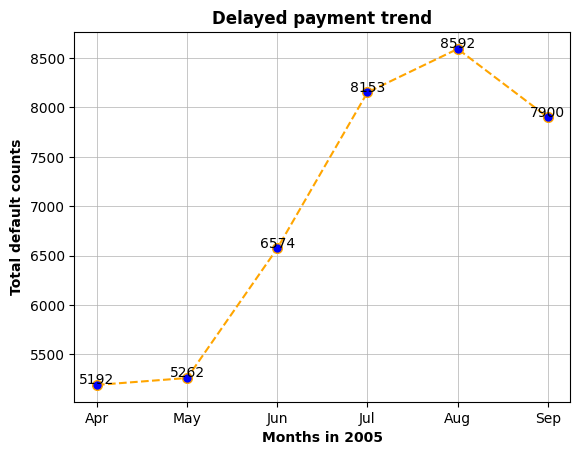

In [27]:
# Tạo cột mới "has_def" để xác định khách hàng có ít nhất một lần trễ hạn thanh toán
def_condition = (df.PAY_1 > 1) | (df.PAY_2 > 1) | (df.PAY_3 > 1) | (df.PAY_4 > 1) | (df.PAY_5 > 1) | (df.PAY_6 > 1)
df.loc[def_condition, "has_def"] = 1
df.loc[df.has_def.isna(), "has_def"] = 0

# Lọc ra những khách hàng có trễ hạn thanh toán
has_default = df[df['has_def'] == 1]
default_trend = has_default[['PAY_6', 'PAY_5', 'PAY_4', 'PAY_3', 'PAY_2', 'PAY_1']].sum(axis=0)

# Vẽ biểu đồ
fig, ax = plt.subplots()
ax.plot(default_trend, label="Test", color='orange', linestyle='dashed', marker='o', markerfacecolor='blue', markersize=7)

# Gán nhãn cho trục x
plt.xticks(['PAY_6', 'PAY_5', 'PAY_4', 'PAY_3', 'PAY_2', 'PAY_1'], ['Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep'])
plt.grid(True, linewidth=0.5, linestyle='-')
plt.xlabel('Months in 2005', fontweight='bold')
plt.ylabel('Total default counts', fontweight='bold')
plt.title('Delayed payment trend', fontweight='bold')

# Thêm nhãn số trên từng điểm dữ liệu
for i, value in enumerate(default_trend):
    ax.text(i, value + 10, f'{int(value)}', ha='center', fontsize=10, color='black')  # Điều chỉnh vị trí của nhãn số

plt.show()


In [28]:
df.drop('has_def', axis = 1, inplace = True)

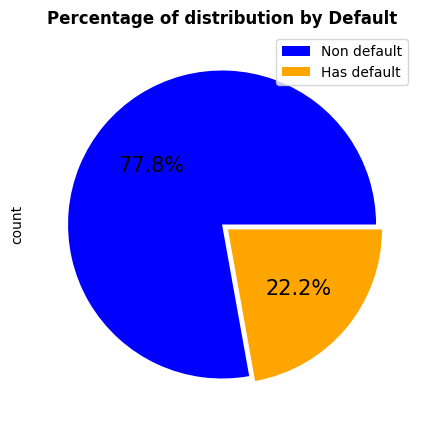

In [29]:
plt.figure(figsize=(7,5))

df['default'].value_counts().plot(kind='pie',labels = ['',''], autopct='%1.1f%%', colors = ['blue','orange'], explode = [0,0.05], textprops = {"fontsize":15})

plt.legend(labels=['Non default', 'Has default'])
plt.title('Percentage of distribution by Default',weight ='bold')

plt.show()

/var/folders/c2/zqjzltfn0lq_by9xz6b6pr9h0000gp/T/ipykernel_2720/2131839887.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax1 = sns.countplot(x="SEX", data=df, palette=custom_palette_1, ax=axes[0])
/var/folders/c2/zqjzltfn0lq_by9xz6b6pr9h0000gp/T/ipykernel_2720/2131839887.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(['Male', 'Female'], fontsize=11)  # Đặt lại nhãn
/var/folders/c2/zqjzltfn0lq_by9xz6b6pr9h0000gp/T/ipykernel_2720/2131839887.py:27: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(['Male', 'Female'], fontsize=11)


<Figure size 600x400 with 0 Axes>

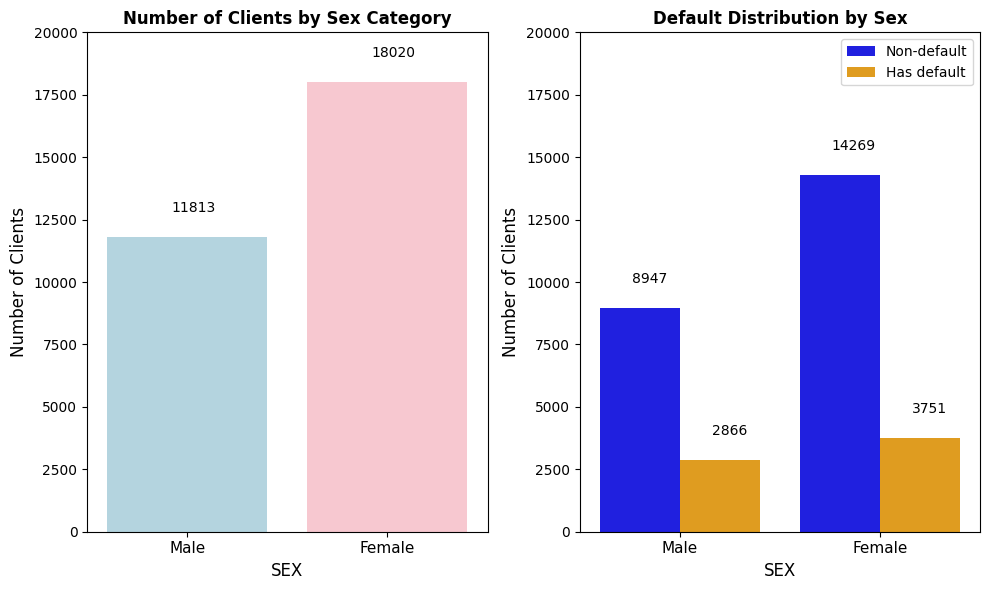

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
fig, axes = plt.subplots(1, 2, figsize=(10, 6))
custom_palette = ['blue', 'orange']
custom_palette_1 = ['lightblue', 'pink']  # Sửa tên màu hợp lệ

# Plot Distribution by SEX
ax1 = sns.countplot(x="SEX", data=df, palette=custom_palette_1, ax=axes[0])
ax1.set_xlabel("SEX", fontsize=12)
ax1.set_ylabel("Number of Clients", fontsize=12)
ax1.set_ylim(0, 20000)
ax1.set_xticklabels(['Male', 'Female'], fontsize=11)  # Đặt lại nhãn
ax1.set_title('Number of Clients by Sex Category', weight='bold')

for p in ax1.patches:
    height = p.get_height()
    if height > 0:
        ax1.annotate(int(height), (p.get_x() + 0.32, height + 1000))

# Plot Default status by SEX
ax2 = sns.countplot(data=df, x='SEX', hue="default", palette=custom_palette, ax=axes[1])
ax2.set_xlabel("SEX", fontsize=12)
ax2.set_ylabel("Number of Clients", fontsize=12)
ax2.set_ylim(0, 20000)
ax2.set_xticklabels(['Male', 'Female'], fontsize=11)
ax2.legend(labels=['Non-default', 'Has default'])
ax2.set_title('Default Distribution by Sex', weight='bold')

for p in ax2.patches:
    height = p.get_height()
    if height > 0:
        ax2.annotate(int(height), (p.get_x() + 0.16, height + 1000))

# Show the plots
plt.tight_layout()  # Ensure proper spacing between plots
plt.show()


/var/folders/c2/zqjzltfn0lq_by9xz6b6pr9h0000gp/T/ipykernel_2720/1483250597.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax1 = sns.countplot(x="EDUCATION", data=df, palette='Spectral', ax=axes[0])
/var/folders/c2/zqjzltfn0lq_by9xz6b6pr9h0000gp/T/ipykernel_2720/1483250597.py:32: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax3 = sns.barplot(x = "SEX", y = "default", hue = "EDUCATION", data = df, palette = 'Spectral', ci = None, ax=axes[2])


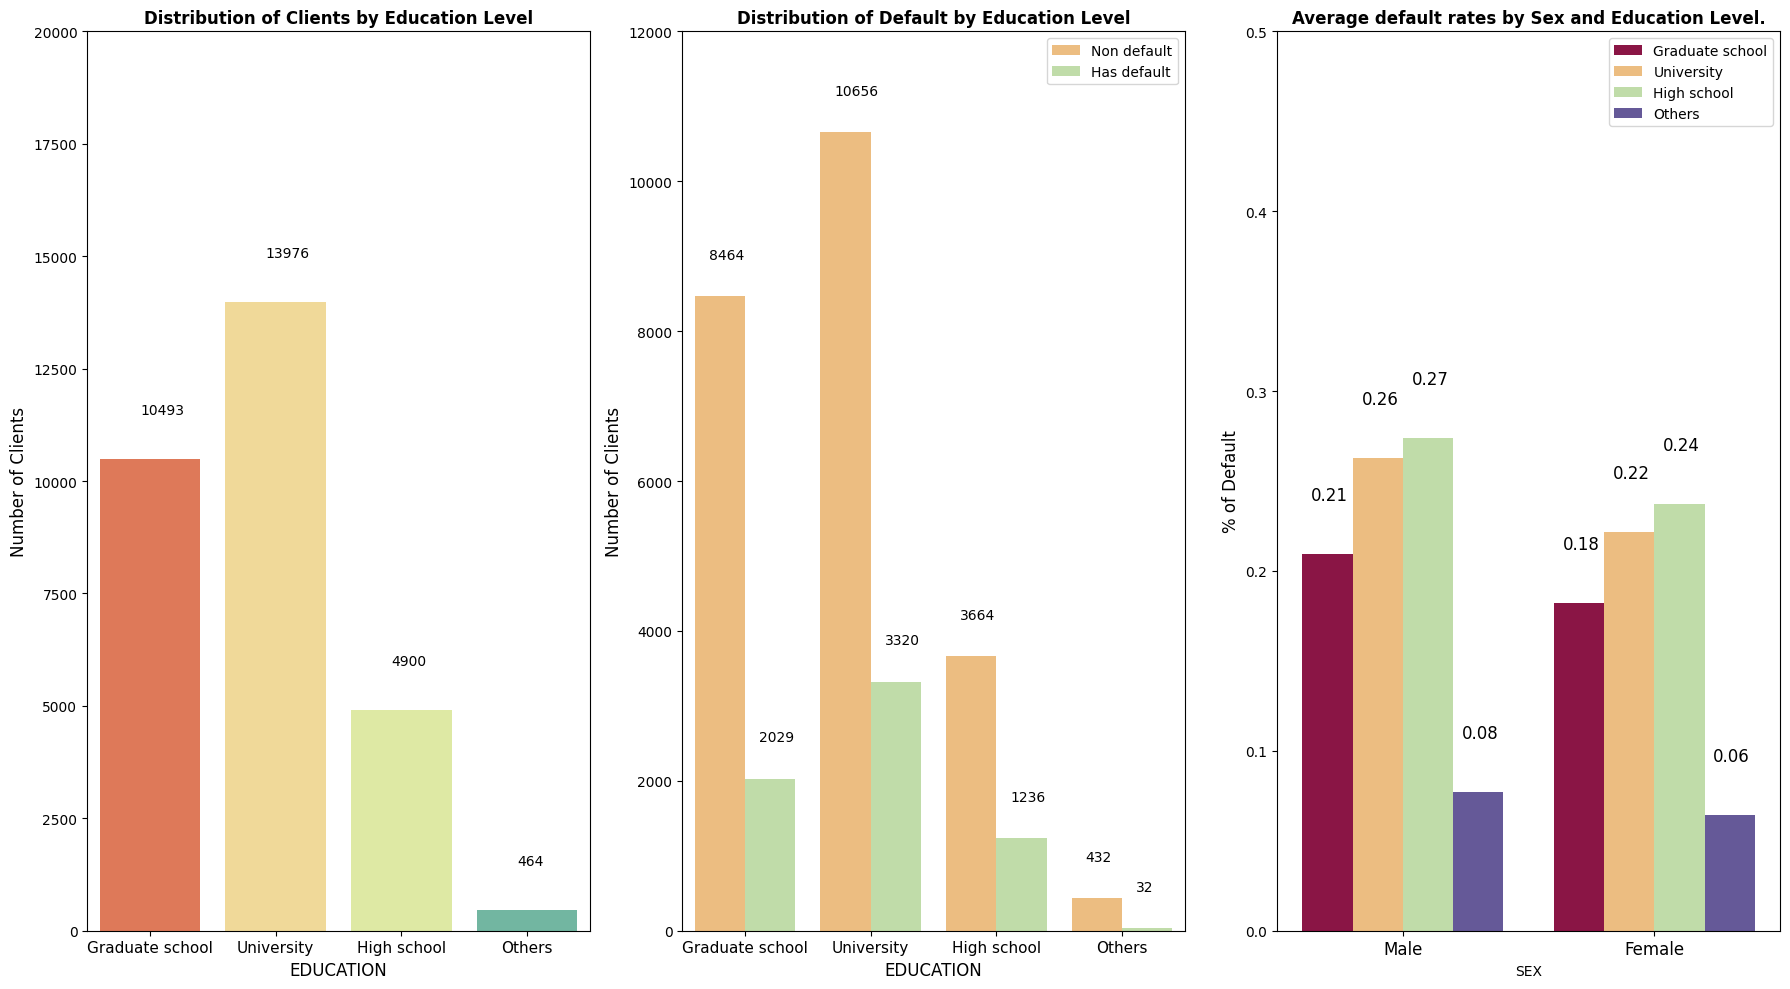

In [31]:
#plt.figure(figsize=(12,8))
fig, axes = plt.subplots(1,3, figsize=(18,10))

ax1 = sns.countplot(x="EDUCATION", data=df, palette='Spectral', ax=axes[0])

ax1.set_xlabel("EDUCATION", fontsize= 12)
ax1.set_ylabel("Number of Clients", fontsize= 12)
ax1.set_ylim(0,20000)
#plt.xticks([0,1],['Male', 'Female'], fontsize = 11)
ax1.set_xticks([0,1,2,3],['Graduate school', 'University', 'High school', 'Others'], fontsize = 11)
ax1.set_title('Distribution of Clients by Education Level',weight ='bold')

for p in ax1.patches:
    height = p.get_height()
    if height > 0:
      ax1.annotate(int(p.get_height()), (p.get_x()+0.32, p.get_height()+1000))

ax2 = sns.countplot(data = df, x = 'EDUCATION', hue="default", palette = 'Spectral', ax=axes[1])

ax2.set_xlabel("EDUCATION", fontsize= 12)
ax2.set_ylabel("Number of Clients", fontsize= 12)
ax2.set_ylim(0,12000)
ax2.set_xticks([0,1,2,3],['Graduate school', 'University', 'High school', 'Others'], fontsize = 11)
ax2.legend(labels=['Non default', 'Has default'])
ax2.set_title('Distribution of Default by Education Level',weight ='bold')

for p in ax2.patches:
    height = p.get_height()
    if height > 0:
      ax2.annotate(int(p.get_height()), (p.get_x()+0.11, p.get_height()+500))

ax3 = sns.barplot(x = "SEX", y = "default", hue = "EDUCATION", data = df, palette = 'Spectral', ci = None, ax=axes[2])
ax3.set_ylabel("% of Default", fontsize= 12)
ax3.set_ylim(0,0.5)
ax3.legend(labels=['Graduate school', 'University', 'High school', 'Others'])
ax3.set_xticks([0,1],['Male', 'Female'], fontsize = 12)
ax3.set_title('Average default rates by Sex and Education Level.',weight ='bold')
for p in ax3.patches:
  height = p.get_height()
  if height > 0:
      ax3.annotate("%.2f" %(p.get_height()), (p.get_x()+0.035, p.get_height()+0.03),fontsize=12)

plt.tight_layout()  # Ensure proper spacing between plots
plt.show()


In [32]:
df

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default,Age_group,Limit Balance
0,20000.0,2,2,1,24,2,2,-1,-1,-2,...,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1,18-34,"(5000, 50000]"
1,120000.0,2,2,2,26,-1,2,0,0,0,...,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1,18-34,"(100000, 150000]"
2,90000.0,2,2,2,34,0,0,0,0,0,...,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0,18-34,"(50000, 100000]"
3,50000.0,2,2,1,37,0,0,0,0,0,...,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0,35-44,"(5000, 50000]"
4,50000.0,1,2,1,57,-1,0,-1,0,0,...,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0,45-64,"(5000, 50000]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,220000.0,1,3,1,39,0,0,0,0,0,...,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0,35-44,"(200000, 300000]"
29996,150000.0,1,3,2,43,-1,-1,-1,-1,0,...,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0,35-44,"(100000, 150000]"
29997,30000.0,1,2,2,37,4,3,2,-1,0,...,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1,35-44,"(5000, 50000]"
29998,80000.0,1,3,1,41,1,-1,0,0,0,...,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1,35-44,"(50000, 100000]"


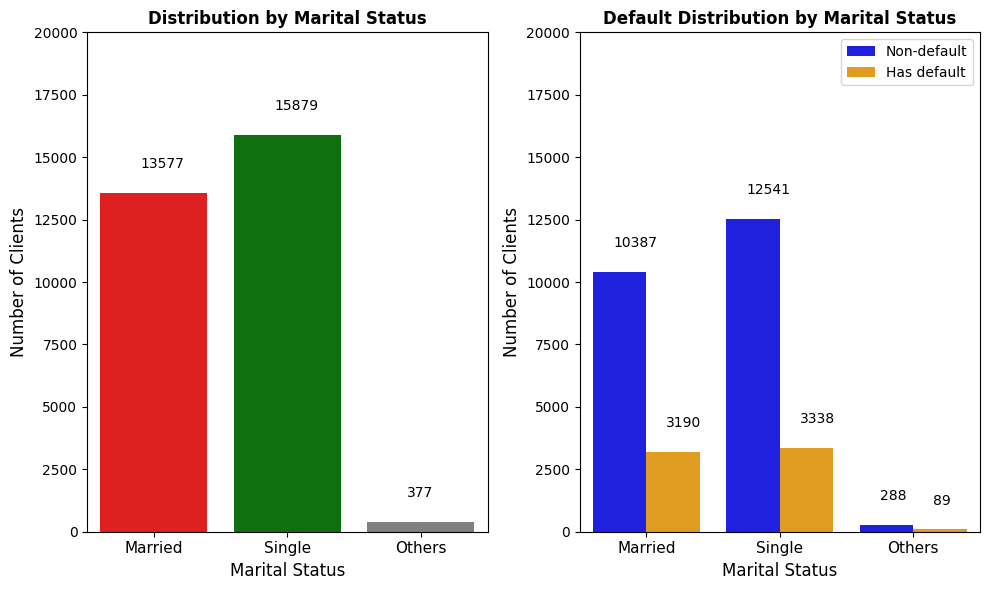

In [33]:
fig, axes = plt.subplots(1, 2, figsize=(10, 6))
custom_palette = ['red', 'green', 'grey']

# Sửa lỗi FutureWarning bằng cách thêm hue="MARRIAGE" và tắt chú giải
ax1 = sns.countplot(x="MARRIAGE", data=df, hue="MARRIAGE", palette=custom_palette, ax=axes[0], legend=False)
ax1.set_xlabel("Marital Status", fontsize=12)
ax1.set_ylabel("Number of Clients", fontsize=12)
ax1.set_ylim(0, 20000)
ax1.set_xticks([0, 1, 2])
ax1.set_xticklabels(['Married', 'Single', 'Others'], fontsize=11)
ax1.set_title('Distribution by Marital Status', weight='bold')

for p in ax1.patches:
    height = p.get_height()
    if height > 0:
        ax1.annotate(int(p.get_height()), (p.get_x() + 0.3, p.get_height() + 1000))

# Sửa tên biến từ custom_pallette1 thành custom_palette1
custom_palette1 = ['blue', 'orange']

ax2 = sns.countplot(data=df, x='MARRIAGE', hue="default", palette=custom_palette1, ax=axes[1])
ax2.set_xlabel("Marital Status", fontsize=12)
ax2.set_ylabel("Number of Clients", fontsize=12)
ax2.set_ylim(0, 20000)
ax2.set_xticks([0, 1, 2])
ax2.set_xticklabels(['Married', 'Single', 'Others'], fontsize=11)
ax2.legend(labels=['Non-default', 'Has default'])
ax2.set_title('Default Distribution by Marital Status', weight='bold')

for p in ax2.patches:
    height = p.get_height()
    if height > 0:
        ax2.annotate(int(p.get_height()), (p.get_x() + 0.15, p.get_height() + 1000))

plt.tight_layout()
plt.show()


In [34]:
df['Age_group']=pd.cut(df['AGE'],[18,34,44,64,75],labels=['18-34','35-44','45-64','>64'])

In [35]:
df['default'].groupby(df['Age_group']).value_counts(normalize = True)*100

/var/folders/c2/zqjzltfn0lq_by9xz6b6pr9h0000gp/T/ipykernel_2720/4202411516.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df['default'].groupby(df['Age_group']).value_counts(normalize = True)*100


Age_group  default
18-34      0          78.486922
           1          21.513078
35-44      0          78.043333
           1          21.956667
45-64      0          75.472433
           1          24.527567
>64        0          74.074074
           1          25.925926
Name: proportion, dtype: float64

/var/folders/c2/zqjzltfn0lq_by9xz6b6pr9h0000gp/T/ipykernel_2720/4007016512.py:7: UserWarning: The palette list has more values (3) than needed (2), which may not be intended.
  ax = sns.countplot(data = df, x = 'Age_group', hue= "default", palette = custom_palette, order = Age_group_order)


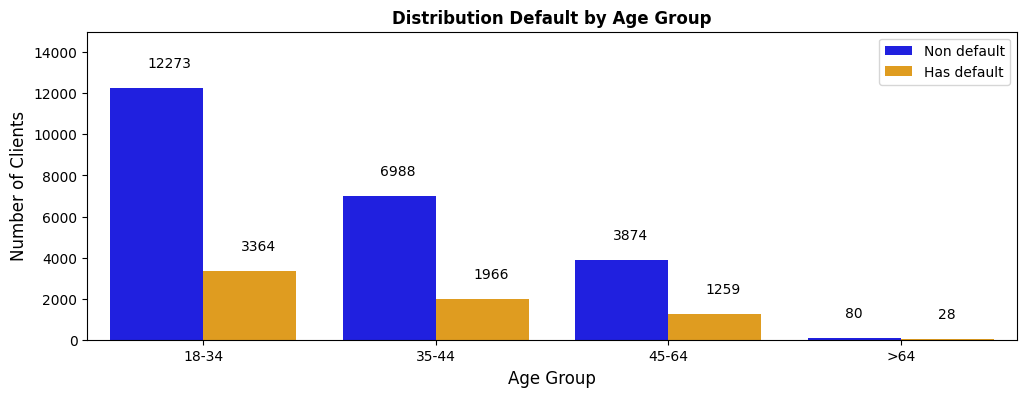

In [36]:
plt.figure(figsize=(12,4))
custom_palette = ['blue', 'orange','grey']

df['Age_group'] = df['Age_group'].astype('str')
Age_group_order = ['18-34','35-44','45-64','>64']

ax = sns.countplot(data = df, x = 'Age_group', hue= "default", palette = custom_palette, order = Age_group_order)

plt.xlabel("Age Group", fontsize= 12)
plt.ylabel("Number of Clients", fontsize= 12)
plt.ylim(0,15000)
plt.legend(labels=['Non default', 'Has default'])
plt.title('Distribution Default by Age Group',weight ='bold')

for p in ax.patches:
   height = p.get_height()
   if height > 0:
      ax.annotate(int(p.get_height()), (p.get_x() + 0.16, p.get_height() + 1000))

plt.show()

In [37]:
df['Limit Balance'] = pd.cut(df['LIMIT_BAL'],[5000, 50000, 100000, 150000, 200000, 300000, 400000, 500000, 1100000])
print(df['Limit Balance'].value_counts())

Limit Balance
(5000, 50000]        7676
(200000, 300000]     5059
(50000, 100000]      4822
(150000, 200000]     3978
(100000, 150000]     3902
(300000, 400000]     2759
(400000, 500000]     1598
(500000, 1100000]      39
Name: count, dtype: int64


In [38]:
df['default'].groupby(df['Limit Balance']).value_counts(normalize = True)*100

/var/folders/c2/zqjzltfn0lq_by9xz6b6pr9h0000gp/T/ipykernel_2720/1088683642.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df['default'].groupby(df['Limit Balance']).value_counts(normalize = True)*100


Limit Balance      default
(5000, 50000]      0          68.212611
                   1          31.787389
(50000, 100000]    0          74.201576
                   1          25.798424
(100000, 150000]   0          78.856996
                   1          21.143004
(150000, 200000]   0          82.151835
                   1          17.848165
(200000, 300000]   0          83.949397
                   1          16.050603
(300000, 400000]   0          85.936934
                   1          14.063066
(400000, 500000]   0          87.859825
                   1          12.140175
(500000, 1100000]  0          89.743590
                   1          10.256410
Name: proportion, dtype: float64

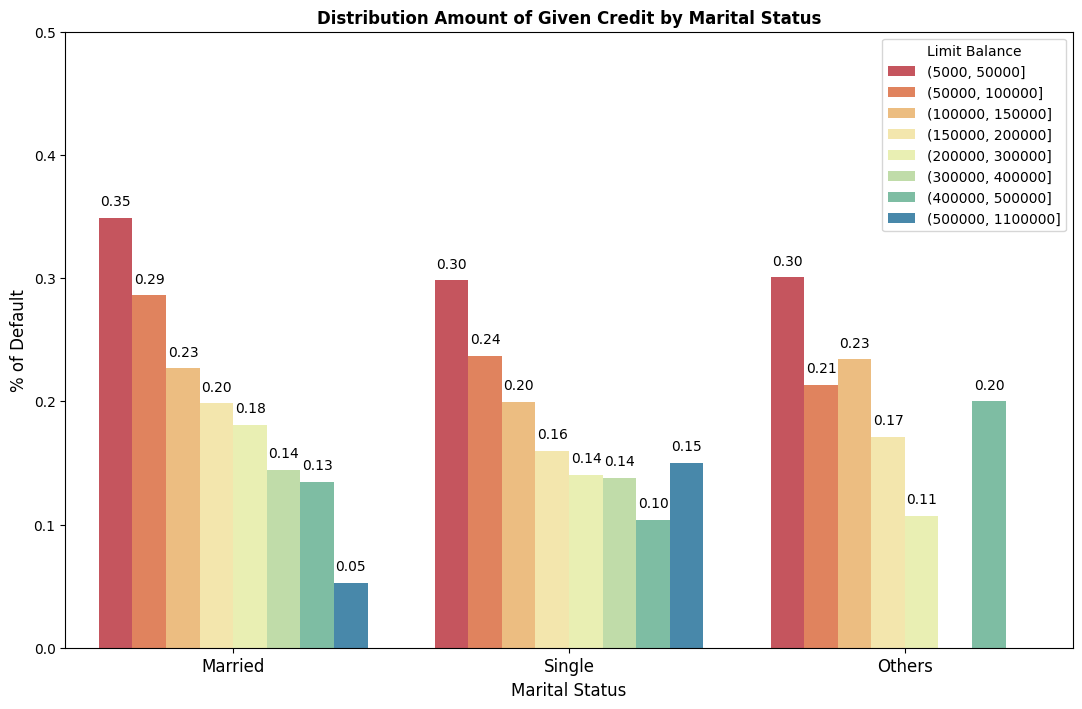

In [39]:
plt.figure(figsize=(13,8))
ax = sns.barplot(x="MARRIAGE", y="default", hue="Limit Balance", data=df, palette='Spectral', errorbar=None)

plt.ylabel("% of Default", fontsize=12)
plt.xlabel("Marital Status", fontsize=12)
plt.ylim(0, 0.5)
plt.xticks([0, 1, 2], ['Married', 'Single', 'Others'], fontsize=12)
plt.title('Distribution Amount of Given Credit by Marital Status', weight='bold')

for p in ax.patches:
    height = p.get_height()
    if height > 0:
        ax.annotate("%.2f" % height, (p.get_x() + 0.005, height + 0.01), fontsize=10)

plt.show()


In [40]:
df.groupby(by=['EDUCATION', 'Limit Balance'])['default'].value_counts(normalize = True)*100

/var/folders/c2/zqjzltfn0lq_by9xz6b6pr9h0000gp/T/ipykernel_2720/3539503784.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(by=['EDUCATION', 'Limit Balance'])['default'].value_counts(normalize = True)*100


EDUCATION  Limit Balance      default
1          (5000, 50000]      0           70.636550
                              1           29.363450
           (50000, 100000]    0           76.133652
                              1           23.866348
           (100000, 150000]   0           78.257687
                                            ...    
4          (300000, 400000]   1            0.000000
           (400000, 500000]   0          100.000000
                              1            0.000000
           (500000, 1100000]  0          100.000000
                              1            0.000000
Name: proportion, Length: 64, dtype: float64

/var/folders/c2/zqjzltfn0lq_by9xz6b6pr9h0000gp/T/ipykernel_2720/2201101867.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(x = "EDUCATION", y = "default", hue = "Limit Balance", data = df, palette = 'Spectral', ci = None)


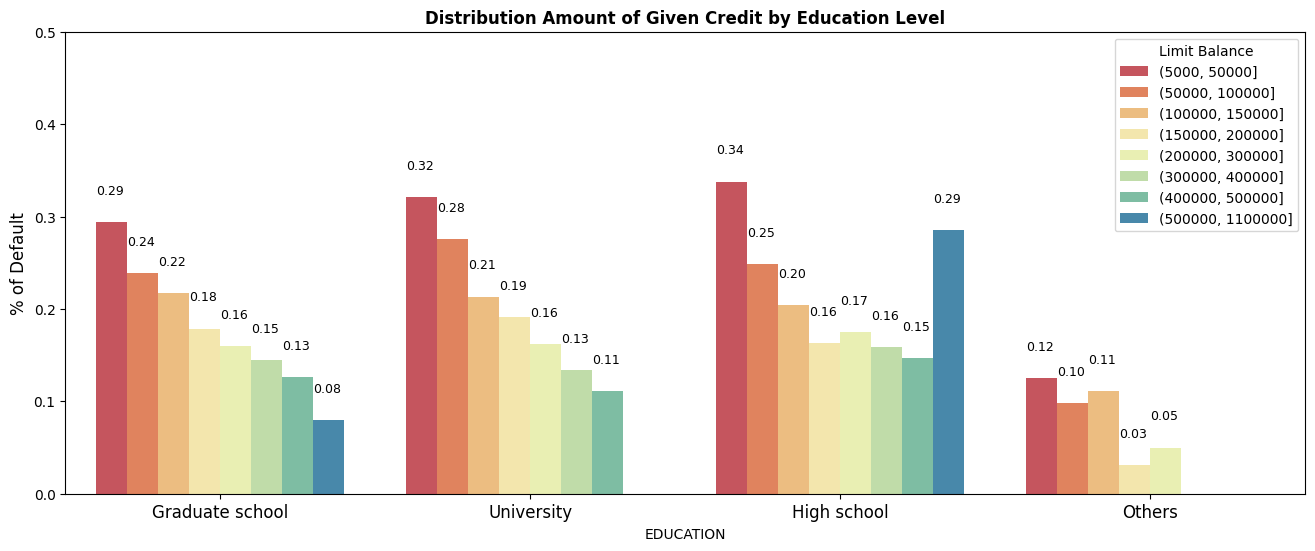

In [41]:
plt.figure(figsize=(16,6))
ax = sns.barplot(x = "EDUCATION", y = "default", hue = "Limit Balance", data = df, palette = 'Spectral', ci = None)
plt.ylabel("% of Default", fontsize= 12)
plt.ylim(0,0.5)
plt.xticks([0,1,2,3],['Graduate school', 'University', 'High school', 'Others'], fontsize = 12)
plt.title('Distribution Amount of Given Credit by Education Level',weight ='bold')
for p in ax.patches:
    height = p.get_height()
    if height > 0:
      ax.annotate("%.2f" %(p.get_height()), (p.get_x()+0.001, p.get_height()+0.03),fontsize=9)
plt.show()

In [42]:
df.groupby(by=['Age_group', 'Limit Balance'])['default'].value_counts(normalize = True)*100

/var/folders/c2/zqjzltfn0lq_by9xz6b6pr9h0000gp/T/ipykernel_2720/1143609866.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(by=['Age_group', 'Limit Balance'])['default'].value_counts(normalize = True)*100


Age_group  Limit Balance      default
18-34      (5000, 50000]      0           68.988354
                              1           31.011646
           (50000, 100000]    0           75.313059
                              1           24.686941
           (100000, 150000]   0           80.429915
                                            ...    
nan        (300000, 400000]   1            0.000000
           (400000, 500000]   0          100.000000
                              1            0.000000
           (500000, 1100000]  0            0.000000
                              1            0.000000
Name: proportion, Length: 80, dtype: float64

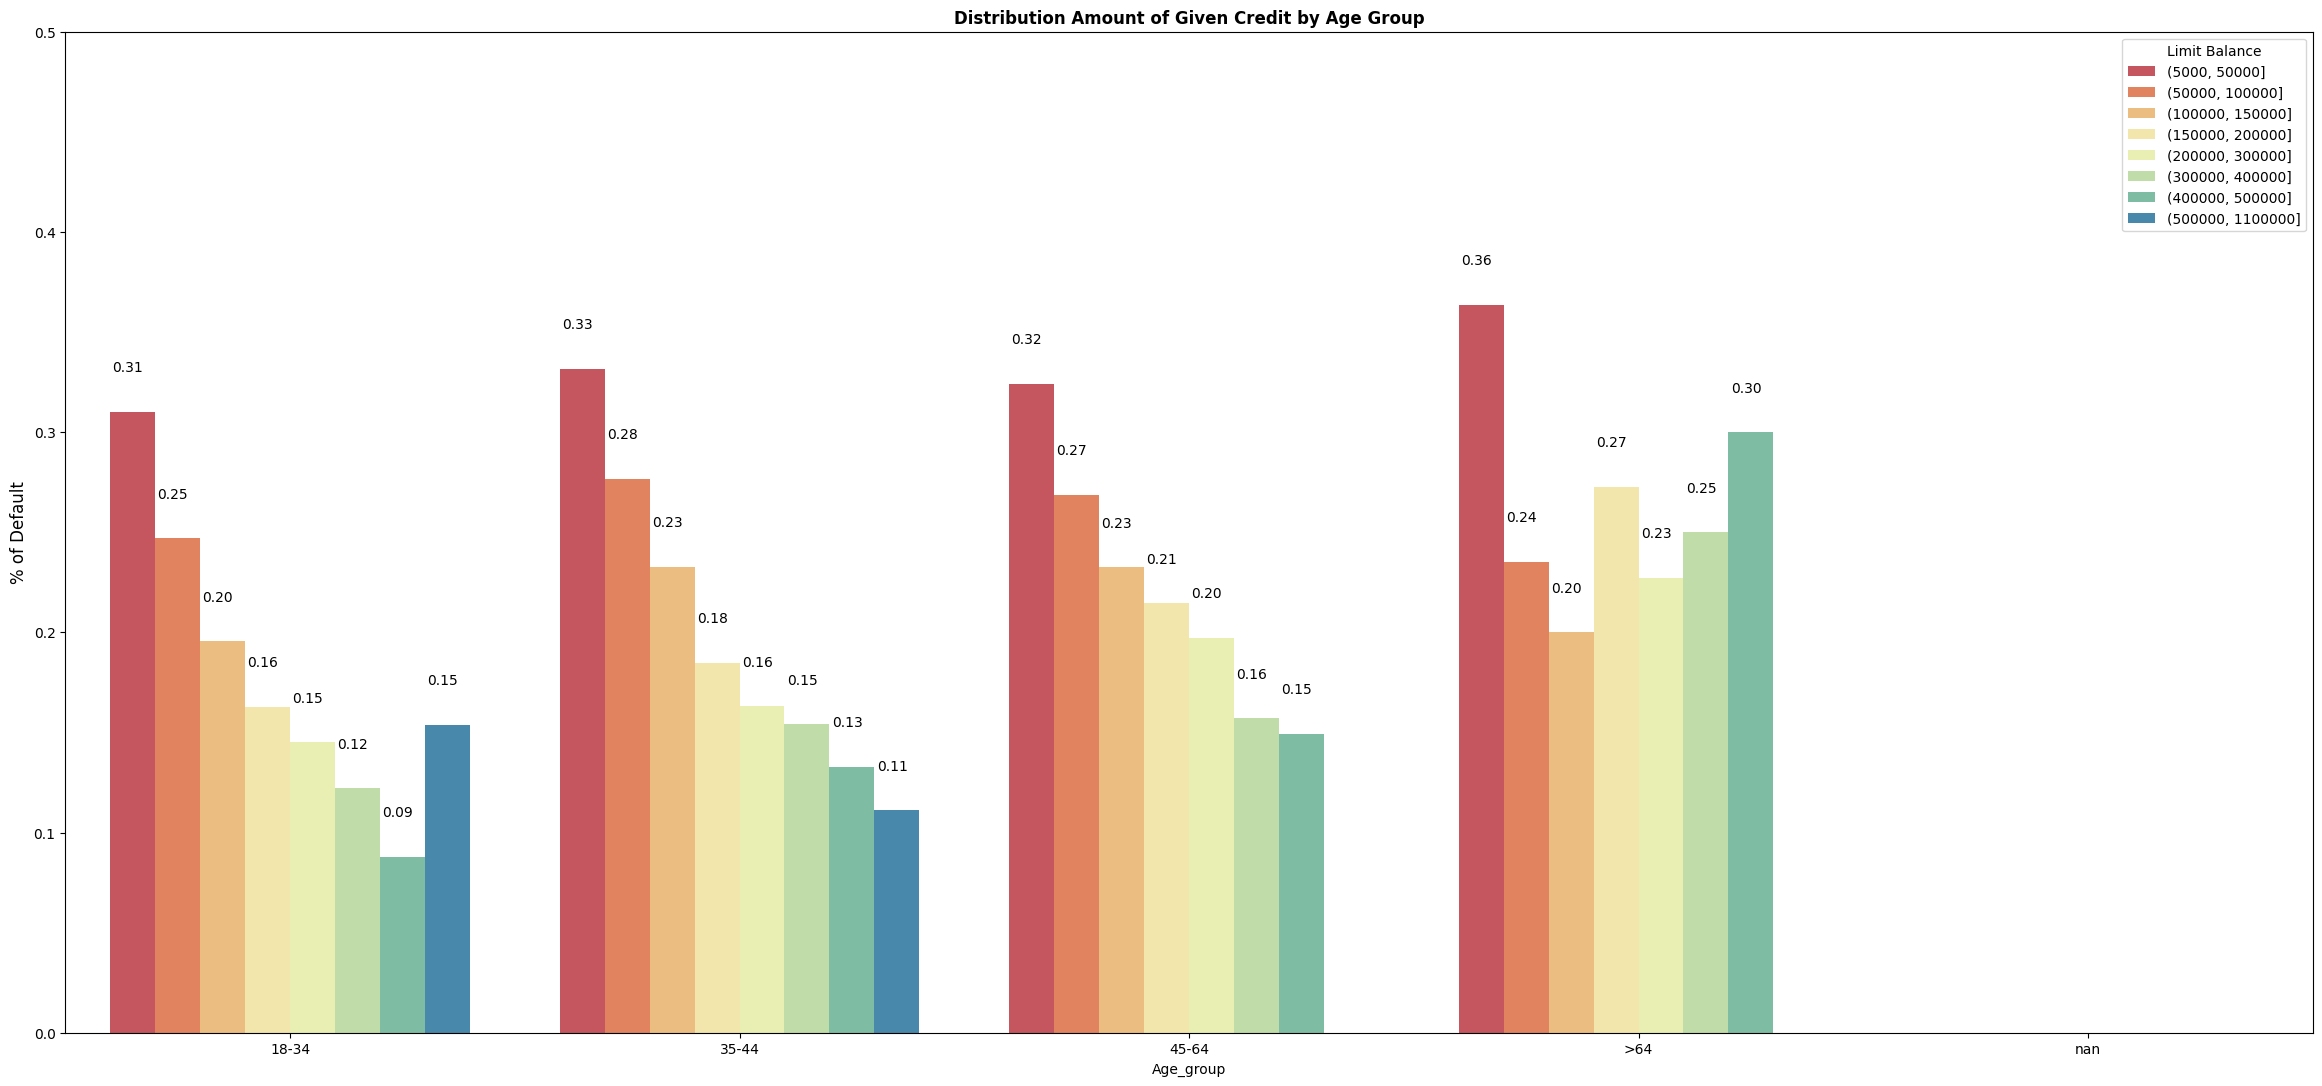

In [43]:
plt.figure(figsize=(29,13))

ax = sns.barplot(x = "Age_group", y = "default", hue = "Limit Balance", data = df,palette = 'Spectral', errorbar=None)

plt.ylabel("% of Default", fontsize= 12)
plt.ylim(0,0.5)
plt.title('Distribution Amount of Given Credit by Age Group',weight ='bold')
for p in ax.patches:
    height = p.get_height()
    if height > 0:
        ax.annotate("%.2f" %(p.get_height()), (p.get_x()+0.005, p.get_height()+0.02),fontsize=10)

plt.show()

/var/folders/c2/zqjzltfn0lq_by9xz6b6pr9h0000gp/T/ipykernel_2720/3807910584.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['LIMIT_BAL'], kde=True,color = 'orange',kde_kws={'color':'Blue'})


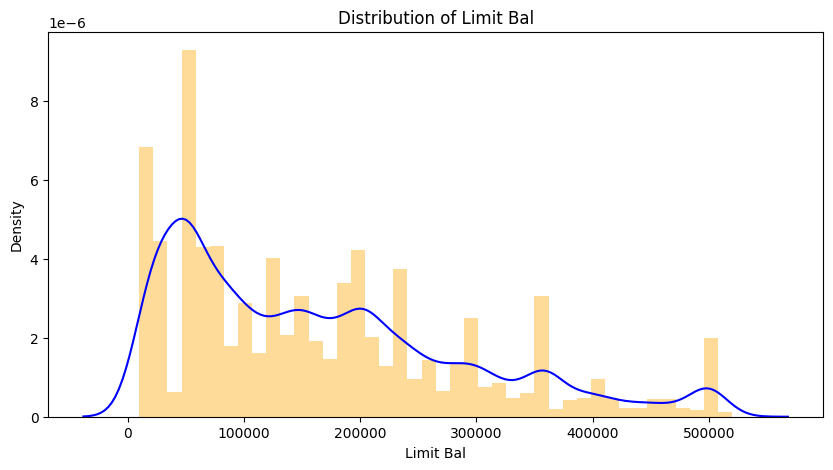

In [44]:
plt.figure(figsize=(10,5))
sns.distplot(df['LIMIT_BAL'], kde=True,color = 'orange',kde_kws={'color':'Blue'})
plt.title('Distribution of Limit Bal')
plt.xlabel('Limit Bal')
plt.ylabel('Density')
plt.show()

/var/folders/c2/zqjzltfn0lq_by9xz6b6pr9h0000gp/T/ipykernel_2720/666489897.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(class_0,kde=True,bins=200, color="blue")
/var/folders/c2/zqjzltfn0lq_by9xz6b6pr9h0000gp/T/ipykernel_2720/666489897.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(cla

<Axes: title={'center': 'Default amount of credit limit (grouped by Payment Next Month)'}, xlabel='LIMIT_BAL', ylabel='Density'>

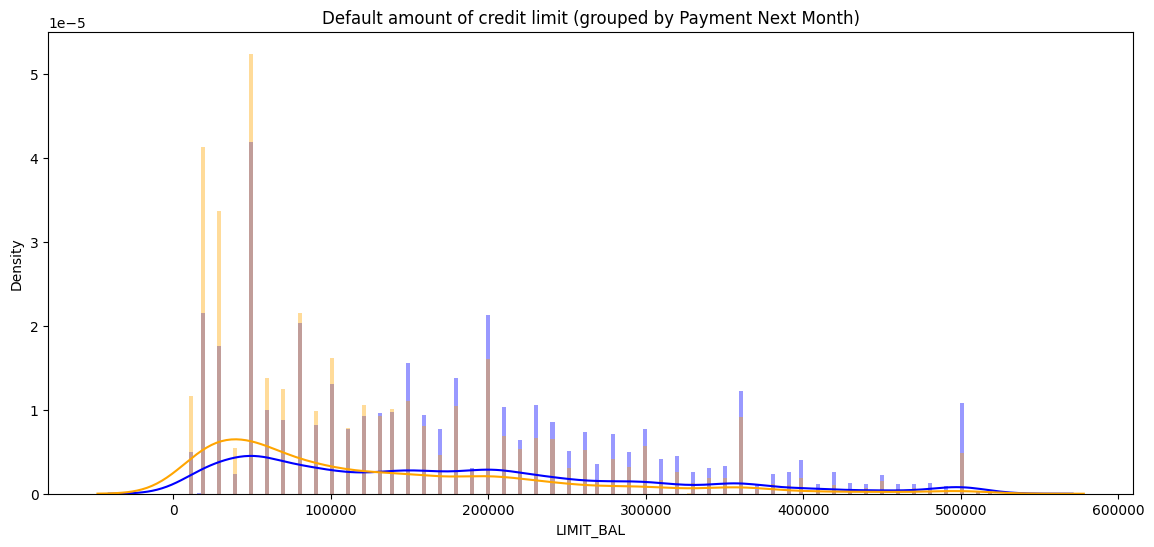

In [45]:
class_0 = df.loc[df['default'] == 0]["LIMIT_BAL"]
class_1 = df.loc[df['default'] == 1]["LIMIT_BAL"]
plt.figure(figsize = (14,6))
plt.title('Default amount of credit limit (grouped by Payment Next Month)')
sns.distplot(class_0,kde=True,bins=200, color="blue")
sns.distplot(class_1,kde=True,bins=200, color="orange")

/var/folders/c2/zqjzltfn0lq_by9xz6b6pr9h0000gp/T/ipykernel_2720/2139806815.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.loc[:,col])
/var/folders/c2/zqjzltfn0lq_by9xz6b6pr9h0000gp/T/ipykernel_2720/2139806815.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.loc[:,col])
/var/folders

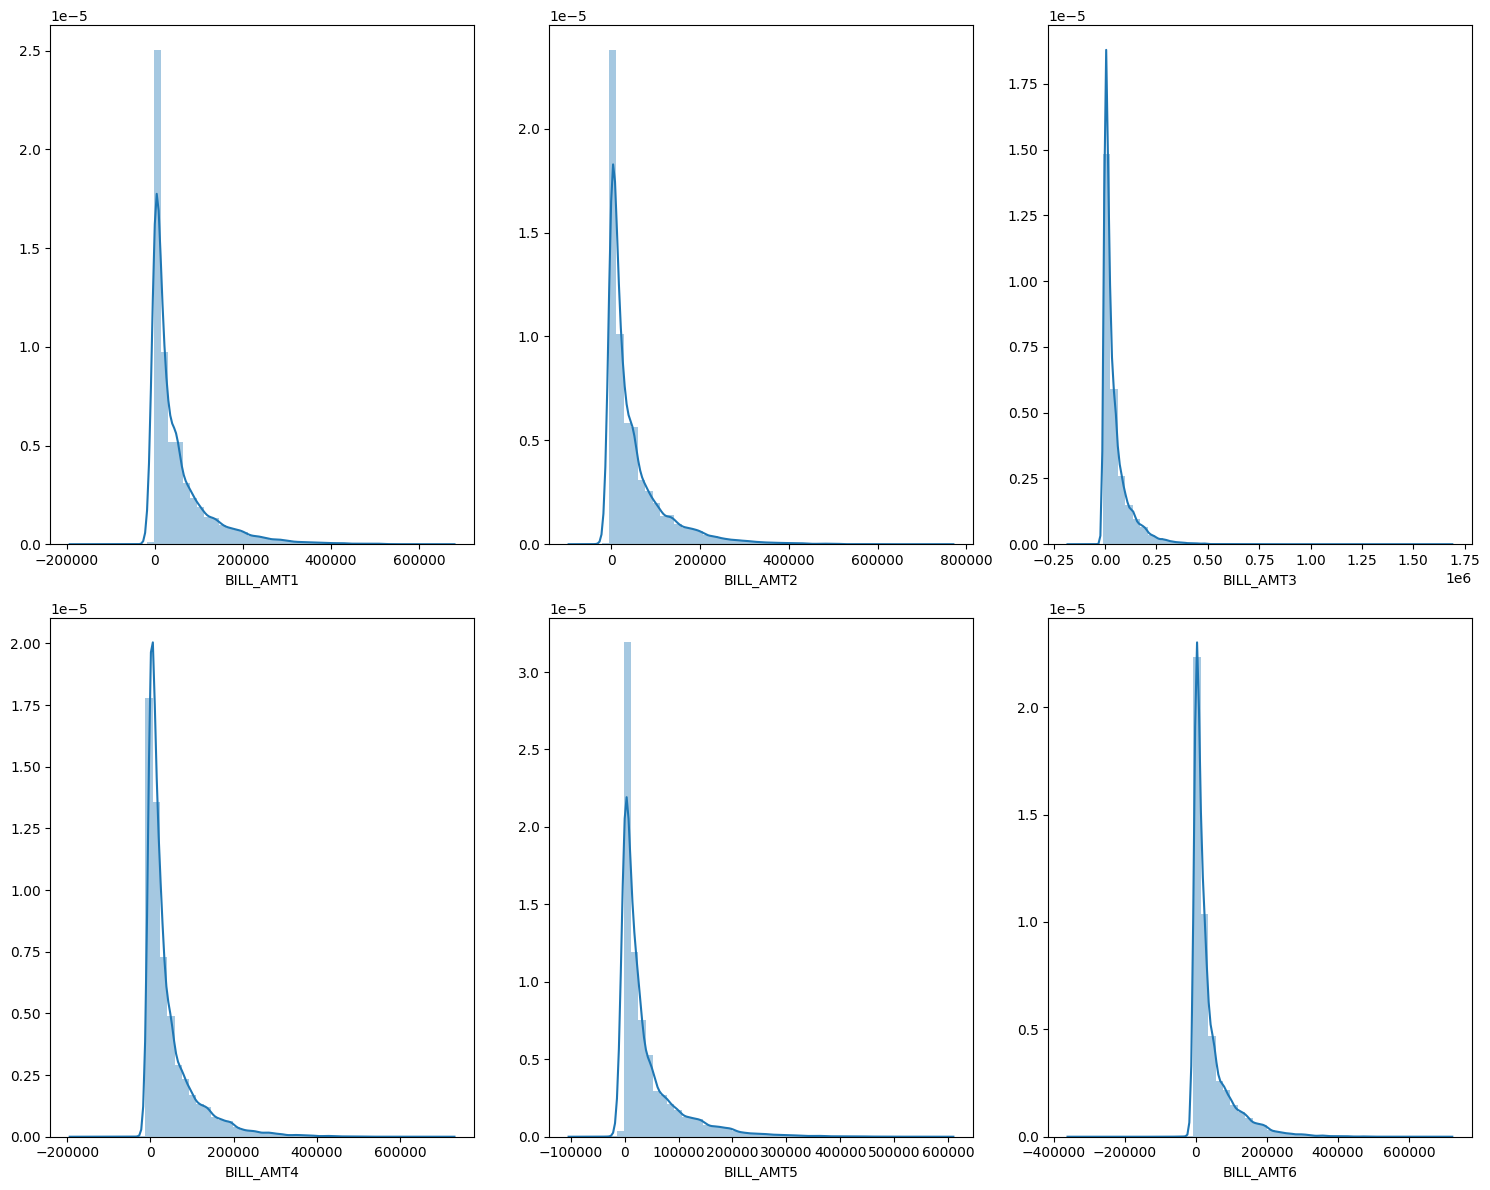

In [46]:
bill_amtx_fts = ['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']
plt.figure(figsize=(15,12))

for i,col in enumerate(bill_amtx_fts):
    plt.subplot(2,3,i + 1)
    sns.distplot(df.loc[:,col])
    plt.ticklabel_format(style='sci', axis='x')
    plt.ylabel('')
    plt.tight_layout()

plt.show()

/var/folders/c2/zqjzltfn0lq_by9xz6b6pr9h0000gp/T/ipykernel_2720/2403202299.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df.loc[(df['default'] == 0), col], label = 'Non default', shade = True)
/var/folders/c2/zqjzltfn0lq_by9xz6b6pr9h0000gp/T/ipykernel_2720/2403202299.py:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df.loc[(df['default'] == 1), col], label = 'Has Default', shade = True)
/var/folders/c2/zqjzltfn0lq_by9xz6b6pr9h0000gp/T/ipykernel_2720/2403202299.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df.loc[(df['default'] == 0), col], label = 'Non default', shade = True)
/var/folders/c2/zqjzltfn0lq_by9

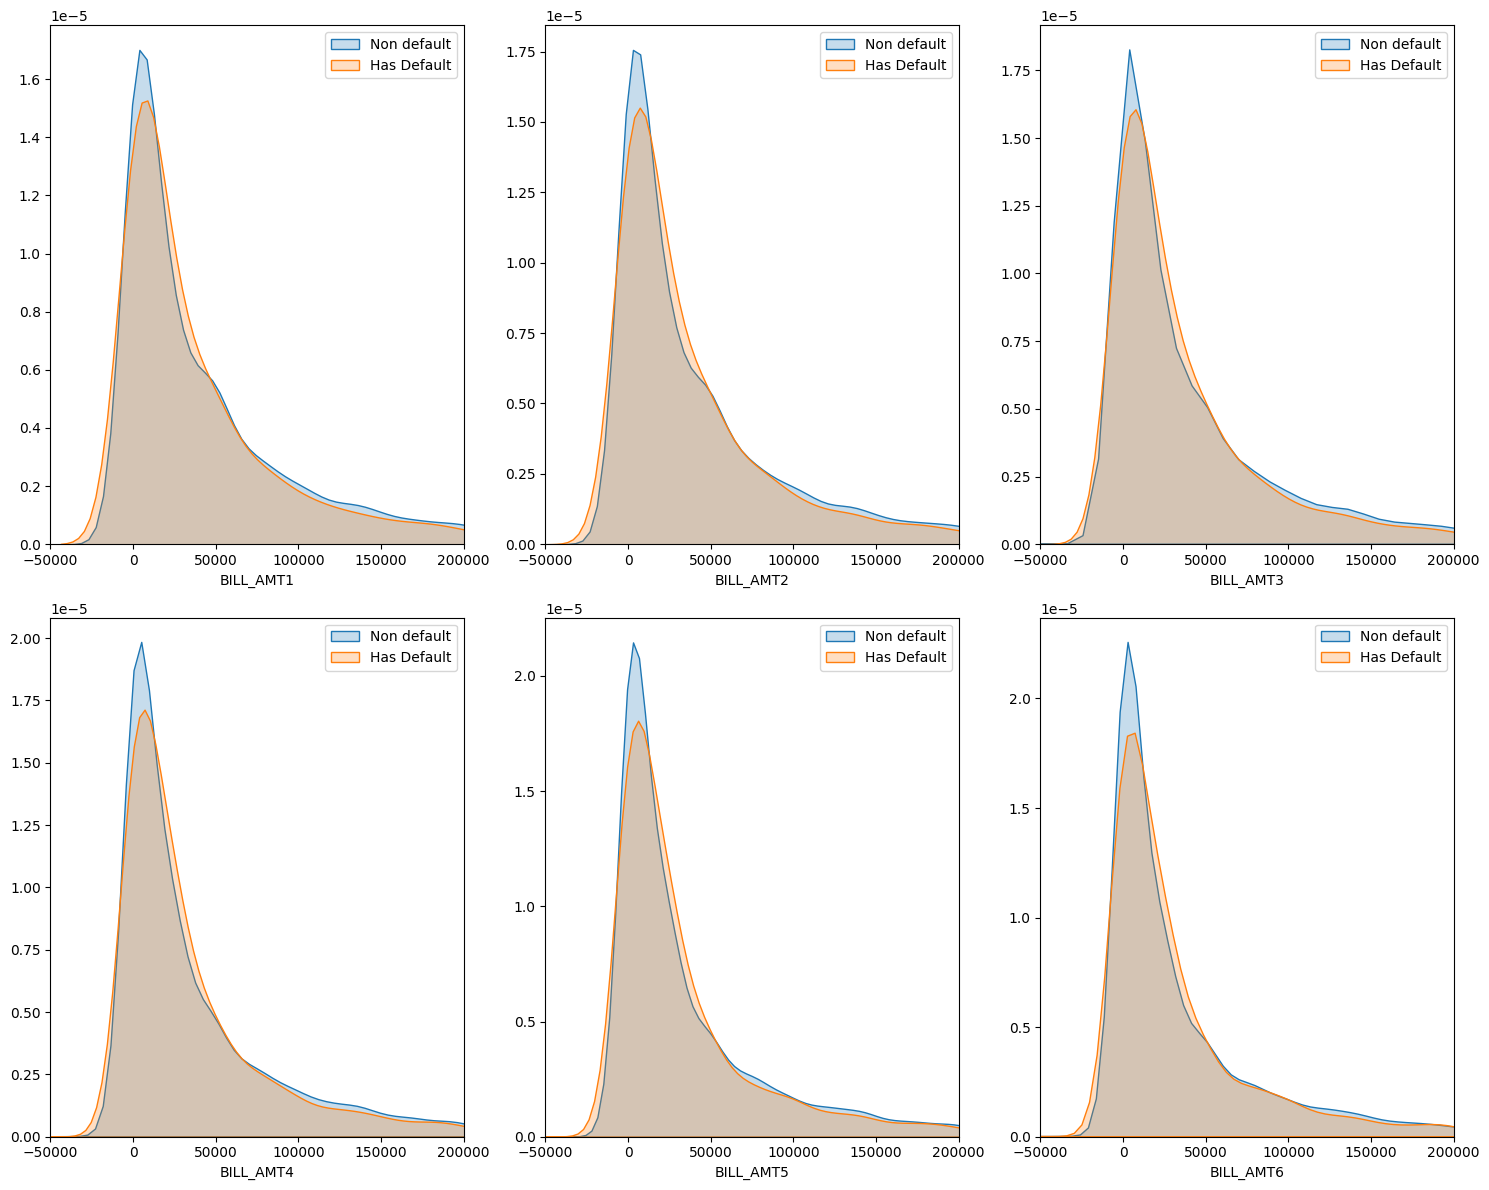

In [47]:
plt.figure(figsize=(15,12))

for i,col in enumerate(bill_amtx_fts):
    plt.subplot(2,3,i + 1)
    sns.kdeplot(df.loc[(df['default'] == 0), col], label = 'Non default', shade = True)
    sns.kdeplot(df.loc[(df['default'] == 1), col], label = 'Has Default', shade = True)
    plt.xlim(-50000,200000)
    plt.ylabel('')
    plt.legend()
    plt.tight_layout()

plt.show()

In [48]:
df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default,Age_group,Limit Balance
0,20000.0,2,2,1,24,2,2,-1,-1,-2,...,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1,18-34,"(5000, 50000]"
1,120000.0,2,2,2,26,-1,2,0,0,0,...,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1,18-34,"(100000, 150000]"
2,90000.0,2,2,2,34,0,0,0,0,0,...,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0,18-34,"(50000, 100000]"
3,50000.0,2,2,1,37,0,0,0,0,0,...,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0,35-44,"(5000, 50000]"
4,50000.0,1,2,1,57,-1,0,-1,0,0,...,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0,45-64,"(5000, 50000]"


In [49]:
df.drop('Age_group', axis = 1, inplace = True)
df.drop('Limit Balance', axis = 1, inplace = True)
df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
0,20000.0,2,2,1,24,2,2,-1,-1,-2,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,120000.0,2,2,2,26,-1,2,0,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,90000.0,2,2,2,34,0,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,50000.0,2,2,1,37,0,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,50000.0,1,2,1,57,-1,0,-1,0,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


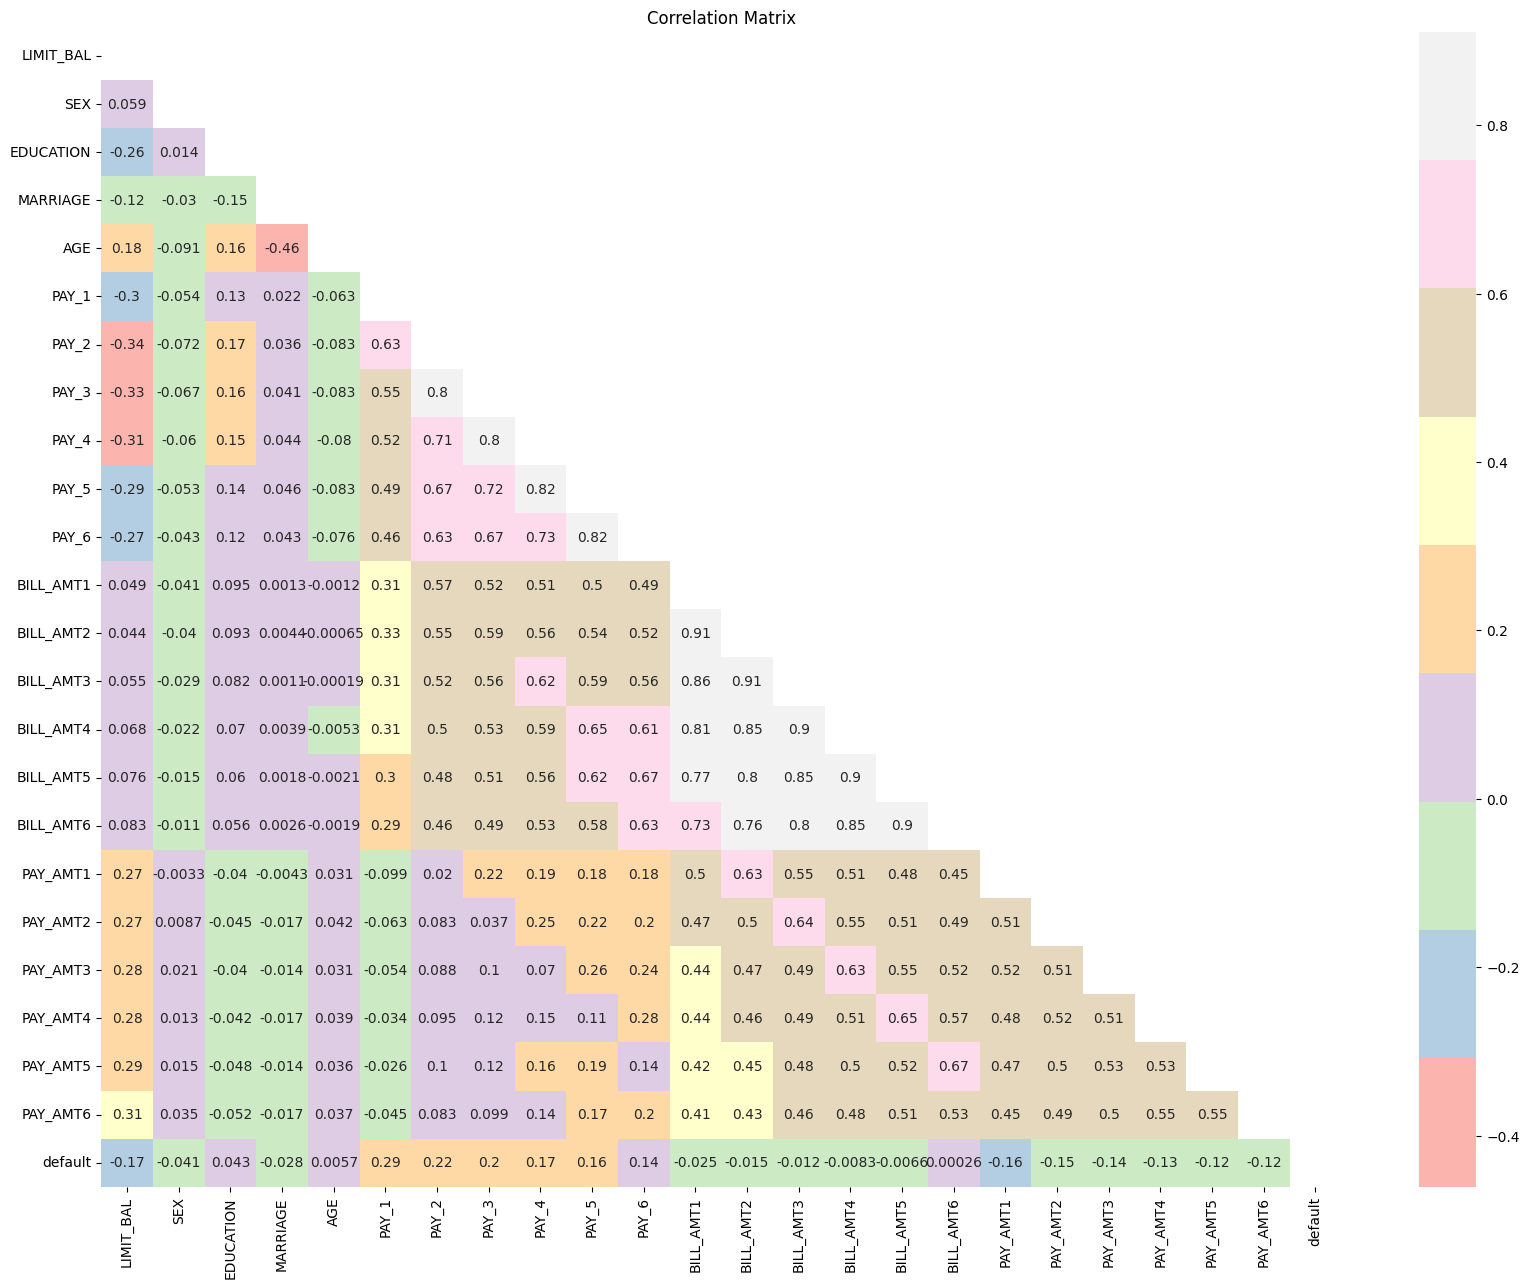

In [50]:
corr_matrix = df.corr(method='spearman')

plt.figure(figsize=(20,15))
sns.heatmap(corr_matrix, cmap='Pastel1', annot=True, fmt='.2g', mask=np.triu(corr_matrix))
plt.title("Correlation Matrix")
plt.show()

In [51]:
df

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
0,20000.0,2,2,1,24,2,2,-1,-1,-2,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,120000.0,2,2,2,26,-1,2,0,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,90000.0,2,2,2,34,0,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,50000.0,2,2,1,37,0,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,50000.0,1,2,1,57,-1,0,-1,0,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,220000.0,1,3,1,39,0,0,0,0,0,...,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0
29996,150000.0,1,3,2,43,-1,-1,-1,-1,0,...,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0
29997,30000.0,1,2,2,37,4,3,2,-1,0,...,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1
29998,80000.0,1,3,1,41,1,-1,0,0,0,...,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1


In [52]:
df_copy=df.copy()
df_copy.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
0,20000.0,2,2,1,24,2,2,-1,-1,-2,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,120000.0,2,2,2,26,-1,2,0,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,90000.0,2,2,2,34,0,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,50000.0,2,2,1,37,0,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,50000.0,1,2,1,57,-1,0,-1,0,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


# Build classifier using different Machine Learning algorihtms


# Model training with imbalanced pre-processing
UnderSampling 

OverSampling
  * Random OverSampling 
  * SMOTE

* Random Oversampling: Tạo ra các bản sao của các mẫu thuộc lớp thiểu số một cách ngẫu nhiên.
* SMOTE: Tạo ra các mẫu tổng hợp mới từ lớp thiểu số dựa trên nội suy giữa các mẫu thiểu số hiện có.
* Scaling: Được áp dụng trước khi thực hiện các phương pháp xử lý mất cân bằng để đảm bảo dữ liệu đã chuẩn hóa.

In [53]:
# chia phân loại giá trị thành hai tập categories columns và numerical columns
cat_columns = [] #categories columns
num_columns = [] #numerical columns

for columns in df_copy.columns:
    if df_copy[columns].nunique()<12:
        cat_columns.append(columns)
    else:
        num_columns.append(columns)
    
print("Categorical Columns Are : ", cat_columns)
print("Numerical Columns Are : ", num_columns)

Categorical Columns Are :  ['SEX', 'EDUCATION', 'MARRIAGE', 'PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'default']
Numerical Columns Are :  ['LIMIT_BAL', 'AGE', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']


In [54]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PowerTransformer
from sklearn.compose import ColumnTransformer
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler
import pandas as pd

# Tách biến mục tiêu và các đặc trưng
X = df.drop(['default'], axis=1)
y = df['default']

# 2. Random Oversampling
ros = RandomOverSampler(random_state=42)
X_ros, y_ros = ros.fit_resample(X, y)

# 3. SMOTE
smote = SMOTE(random_state=42)
X_smote, y_smote = smote.fit_resample(X, y)

# Kiểm tra kích thước của các tập dữ liệu sau khi xử lý mất cân bằng
print("Kích thước tập dữ liệu sau Random Oversampling:", X_ros.shape, y_ros.shape)
print("Kích thước tập dữ liệu sau SMOTE:", X_smote.shape, y_smote.shape)
print("------------------------------------------------------------------------------------------------")

# Bây giờ chia dữ liệu thành tập huấn luyện và kiểm thử cho từng phương pháp
X_train_ros, X_test_ros, y_train_ros, y_test_ros = train_test_split(X_ros, y_ros, test_size=0.2, random_state=42, stratify=y_ros)
X_train_smote, X_test_smote, y_train_smote, y_test_smote = train_test_split(X_smote, y_smote, test_size=0.2, random_state=42, stratify=y_smote)

# Phân loại các cột thành dạng số và dạng phân loại
cat_columns = []
num_columns = []

for columns in X.columns:
    if X[columns].nunique() < 12:
        cat_columns.append(columns)
    else:
        num_columns.append(columns)

print("Categorical Columns Are : ", cat_columns)
print("Numerical Columns Are : ", num_columns)

# Chuẩn bị cho việc powertransformer các đặc trưng bằng phương pháp gauss
transformer = ColumnTransformer(
    [("Transformed", PowerTransformer(), num_columns)],
    remainder="passthrough"
)

# Fit and transform the training data, then transform the test data
X_train_ros_transformed = pd.DataFrame(transformer.fit_transform(X_train_ros), columns=num_columns + cat_columns)
X_test_ros_transformed = pd.DataFrame(transformer.transform(X_test_ros), columns=num_columns + cat_columns)

X_train_smote_transformed = pd.DataFrame(transformer.fit_transform(X_train_smote), columns=num_columns + cat_columns)
X_test_smote_transformed = pd.DataFrame(transformer.transform(X_test_smote), columns=num_columns + cat_columns)

# Kiểm tra kích thước và dạng của dữ liệu đã được biến đổi
print("Kích thước tập huấn luyện sau Power Transformer với Oversampling:", X_train_ros_transformed.shape)
print("Kích thước tập kiểm thử sau Power Transformer với Oversampling:", X_test_ros_transformed.shape)
print("------------------------------------------------------------------------------------------------")
print("Kích thước tập huấn luyện sau Power Transformer với SMOTE:", X_train_smote_transformed.shape)
print("Kích thước tập kiểm thử sau Power Transformer với SMOTE:", X_test_smote_transformed.shape)


Kích thước tập dữ liệu sau Random Oversampling: (46432, 23) (46432,)
Kích thước tập dữ liệu sau SMOTE: (46432, 23) (46432,)
------------------------------------------------------------------------------------------------
Categorical Columns Are :  ['SEX', 'EDUCATION', 'MARRIAGE', 'PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']
Numerical Columns Are :  ['LIMIT_BAL', 'AGE', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']
Kích thước tập huấn luyện sau Power Transformer với Oversampling: (37145, 23)
Kích thước tập kiểm thử sau Power Transformer với Oversampling: (9287, 23)
------------------------------------------------------------------------------------------------
Kích thước tập huấn luyện sau Power Transformer với SMOTE: (37145, 23)
Kích thước tập kiểm thử sau Power Transformer với SMOTE: (9287, 23)


In [55]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score
import numpy as np
from joblib import parallel_backend
import warnings
warnings.filterwarnings('ignore')
# 1. Thu nhỏ không gian tìm kiếm GridSearch nhưng vẫn giữ các tham số quan trọng
param_grid_lr = {
    'C': [0.1, 1, 10],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga'],
    'class_weight': ['balanced', None]
}

param_grid_rf = {
    'n_estimators': [100],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5],
    'class_weight': ['balanced', None]
}

param_grid_knn = {
    'n_neighbors': [3, 5, 7],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

param_grid_xgb = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.1],
    'n_estimators': [100],
    'min_child_weight': [1, 3],
    'scale_pos_weight': [1, 3]
}

In [56]:
# 2. Tạo hàm đánh giá với đầy đủ metric
def evaluate_model_full(y_true, y_pred, y_pred_proba):
    return {
        'Accuracy': accuracy_score(y_true, y_pred),
        'F1 Score': f1_score(y_true, y_pred),
        'Precision': precision_score(y_true, y_pred),
        'Recall': recall_score(y_true, y_pred),
        'ROC AUC': roc_auc_score(y_true, y_pred_proba)
    }

In [57]:
#3 tạo hàm cho việc chạy confusion matrix 
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

def visualize_confusion_matrix(y_true, y_pred, model_name):
    # Tính confusion matrix từ nhãn thật và nhãn dự đoán
    cm = confusion_matrix(y_true, y_pred)
    
    # Thiết lập biểu đồ và hiển thị confusion matrix với chú thích
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix: {model_name}')
    plt.xlabel('Predicted label')  # Gán nhãn cho trục X
    plt.ylabel('True label')       # Gán nhãn cho trục Y
    plt.xticks(ticks=[0.5, 1.5], labels=['Class 0', 'Class 1'], rotation=0)
    plt.yticks(ticks=[0.5, 1.5], labels=['Class 0', 'Class 1'], rotation=0)
    plt.show()


In [58]:
#4 tạo hàm train model 
import pickle
import os
from sklearn.metrics import confusion_matrix, classification_report

def train_evaluate_model(model, param_grid, X_train_dict, y_train_dict, X_test_dict, y_test_dict, model_name, save_path='/Users/manhth1nh/iCloud Drive (Archive)/Desktop/University/Machine-learning - midterm/Lưu model'):
    
    # 3. Khởi tạo dictionary lưu kết quả
    results = {}
    
    # 4. Tạo thư mục lưu mô hình nếu chưa tồn tại
    os.makedirs(save_path, exist_ok=True)

    # 5. Sử dụng parallel processing để tăng tốc độ
    with parallel_backend('threading', n_jobs=-1):
        # 6. Lặp qua từng phương pháp sampling
        for sampling_method, (X_train, y_train) in zip(X_train_dict.keys(), zip(X_train_dict.values(), y_train_dict.values())):
            print(f"Training {model_name} with {sampling_method}...")
            
            # 7. Thiết lập và thực hiện GridSearchCV
            grid_search = GridSearchCV(
                estimator=model,
                param_grid=param_grid,
                cv=5,  # Sử dụng 5-fold cross-validation
                scoring='f1',
                n_jobs=-1,
                verbose=0
            )
            
            # 8. Huấn luyện mô hình
            grid_search.fit(X_train, y_train)
            
            # 9. Dự đoán trên tập test
            X_test = X_test_dict[sampling_method]
            y_test = y_test_dict[sampling_method]
            y_pred_test = grid_search.predict(X_test)
            y_pred_proba_test = grid_search.predict_proba(X_test)[:, 1]
            
            # 10. Dự đoán trên tập train
            y_pred_train = grid_search.predict(X_train)
            y_pred_proba_train = grid_search.predict_proba(X_train)[:, 1]
            
            # 11. Lưu mô hình tốt nhất cho phương pháp sampling hiện tại
            model_filename = f"{save_path}/{model_name}_{sampling_method}_model.pkl"
            with open(model_filename, 'wb') as model_file:
                pickle.dump(grid_search.best_estimator_, model_file)
            print(f"Model saved as {model_filename}")
            
            # 12. Lưu kết quả đánh giá cho tập test
            results[sampling_method] = {
                'best_params': grid_search.best_params_,
                'best_score': grid_search.best_score_,
                'metrics': evaluate_model_full(y_test, y_pred_test, y_pred_proba_test)
            }
            
            # 13. In kết quả cho mỗi phương pháp
            print(f"Best parameters: {grid_search.best_params_}")
            print(f"Best CV score: {grid_search.best_score_:.4f}")
            print("Test metrics:")
            for metric, value in results[sampling_method]['metrics'].items():
                print(f"{metric}: {value:.4f}")
            
            # 14. Đánh giá và in kết quả cho tập train
            train_metrics = evaluate_model_full(y_train, y_pred_train, y_pred_proba_train)
            print("Train metrics:")
            for metric, value in train_metrics.items():
                print(f"{metric}: {value:.4f}")
            
            # 15. Hiển thị confusion matrix và báo cáo phân loại cho tập test
            print("\nTest Confusion Matrix:")
            print(confusion_matrix(y_test, y_pred_test))
            print("\nTest Classification Report:")
            print(classification_report(y_test, y_pred_test))
            visualize_confusion_matrix(y_test, y_pred_test, f"{model_name} - {sampling_method} (Test)")
            
            # 16. Hiển thị confusion matrix và báo cáo phân loại cho tập train
            print("\nTrain Confusion Matrix:")
            print(confusion_matrix(y_train, y_pred_train))
            print("\nTrain Classification Report:")
            print(classification_report(y_train, y_pred_train))
            visualize_confusion_matrix(y_train, y_pred_train, f"{model_name} - {sampling_method} (Train)")
            
            print("-" * 50)
    
    # 17. Trả về kết quả cuối cùng
    return results

In [59]:
# 4. Chuẩn bị dữ liệu
data_dict = {
    'Oversampling': (X_train_ros, y_train_ros, X_test_ros, y_test_ros),
    'SMOTE': (X_train_smote, y_train_smote, X_test_smote, y_test_smote)
}

X_train_dict = {method: data[0] for method, data in data_dict.items()}
y_train_dict = {method: data[1] for method, data in data_dict.items()}
X_test_dict = {method: data[2] for method, data in data_dict.items()}
y_test_dict = {method: data[3] for method, data in data_dict.items()}


In [84]:
# 5. Định nghĩa models
models = {
    'Logistic Regression': (LogisticRegression(random_state=42), param_grid_lr),
    'Random Forest': (RandomForestClassifier(random_state=42), param_grid_rf),
    'KNN': (KNeighborsClassifier(), param_grid_knn),
    'XGBoost': (XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss'), param_grid_xgb)
}


Training Logistic Regression...
Training Logistic Regression with Oversampling...
Model saved as /Users/manhth1nh/iCloud Drive (Archive)/Desktop/University/Machine-learning - midterm/Lưu model/Logistic Regression_Oversampling_model.pkl
Best parameters: {'C': 1, 'class_weight': 'balanced', 'penalty': 'l1', 'solver': 'liblinear'}
Best CV score: 0.6615
Test metrics:
Accuracy: 0.6713
F1 Score: 0.6607
Precision: 0.6825
Recall: 0.6403
ROC AUC: 0.7196
Train metrics:
Accuracy: 0.6735
F1 Score: 0.6626
Precision: 0.6855
Recall: 0.6412
ROC AUC: 0.7273

Test Confusion Matrix:
[[3261 1383]
 [1670 2973]]

Test Classification Report:
              precision    recall  f1-score   support

           0       0.66      0.70      0.68      4644
           1       0.68      0.64      0.66      4643

    accuracy                           0.67      9287
   macro avg       0.67      0.67      0.67      9287
weighted avg       0.67      0.67      0.67      9287



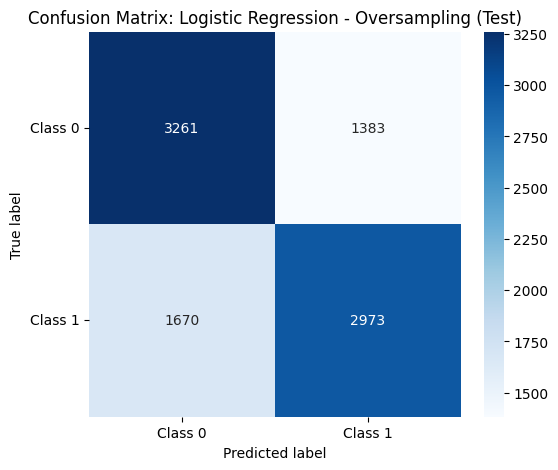


Train Confusion Matrix:
[[13109  5463]
 [ 6664 11909]]

Train Classification Report:
              precision    recall  f1-score   support

           0       0.66      0.71      0.68     18572
           1       0.69      0.64      0.66     18573

    accuracy                           0.67     37145
   macro avg       0.67      0.67      0.67     37145
weighted avg       0.67      0.67      0.67     37145



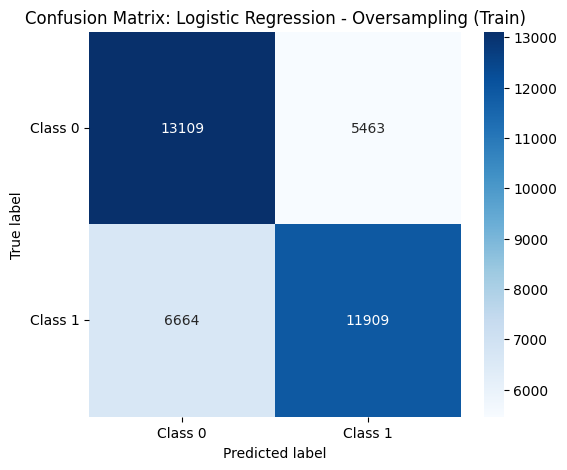

--------------------------------------------------
Training Logistic Regression with SMOTE...
Model saved as /Users/manhth1nh/iCloud Drive (Archive)/Desktop/University/Machine-learning - midterm/Lưu model/Logistic Regression_SMOTE_model.pkl
Best parameters: {'C': 1, 'class_weight': None, 'penalty': 'l1', 'solver': 'liblinear'}
Best CV score: 0.7223
Test metrics:
Accuracy: 0.7254
F1 Score: 0.7262
Precision: 0.7241
Recall: 0.7282
ROC AUC: 0.7916
Train metrics:
Accuracy: 0.7228
F1 Score: 0.7223
Precision: 0.7237
Recall: 0.7208
ROC AUC: 0.7934

Test Confusion Matrix:
[[3356 1288]
 [1262 3381]]

Test Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.72      0.72      4644
           1       0.72      0.73      0.73      4643

    accuracy                           0.73      9287
   macro avg       0.73      0.73      0.73      9287
weighted avg       0.73      0.73      0.73      9287



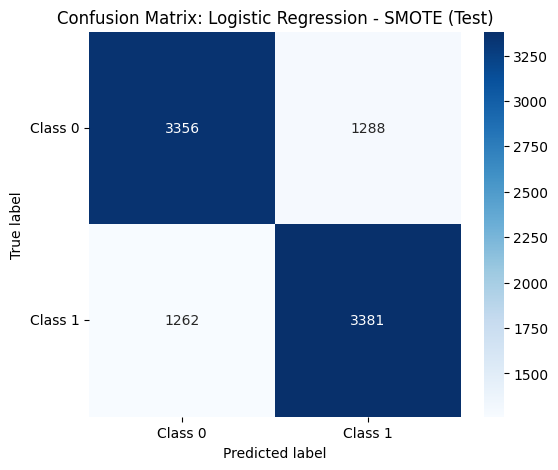


Train Confusion Matrix:
[[13460  5112]
 [ 5185 13388]]

Train Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.72      0.72     18572
           1       0.72      0.72      0.72     18573

    accuracy                           0.72     37145
   macro avg       0.72      0.72      0.72     37145
weighted avg       0.72      0.72      0.72     37145



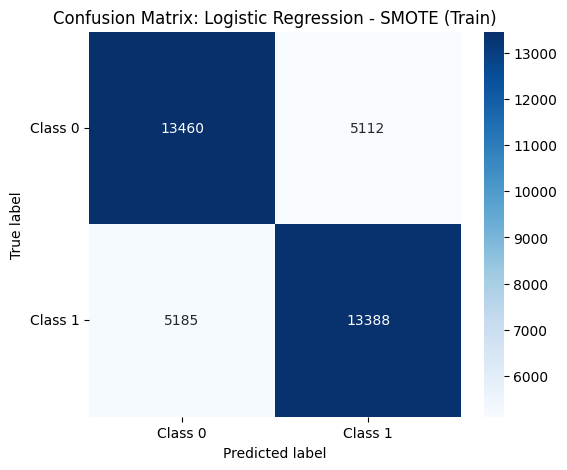

--------------------------------------------------

Training Random Forest...
Training Random Forest with Oversampling...
Model saved as /Users/manhth1nh/iCloud Drive (Archive)/Desktop/University/Machine-learning - midterm/Lưu model/Random Forest_Oversampling_model.pkl
Best parameters: {'class_weight': None, 'max_depth': None, 'min_samples_split': 2, 'n_estimators': 100}
Best CV score: 0.9187
Test metrics:
Accuracy: 0.9295
F1 Score: 0.9319
Precision: 0.9010
Recall: 0.9649
ROC AUC: 0.9787
Train metrics:
Accuracy: 0.9995
F1 Score: 0.9995
Precision: 0.9991
Recall: 0.9998
ROC AUC: 1.0000

Test Confusion Matrix:
[[4152  492]
 [ 163 4480]]

Test Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.89      0.93      4644
           1       0.90      0.96      0.93      4643

    accuracy                           0.93      9287
   macro avg       0.93      0.93      0.93      9287
weighted avg       0.93      0.93      0.93      9287



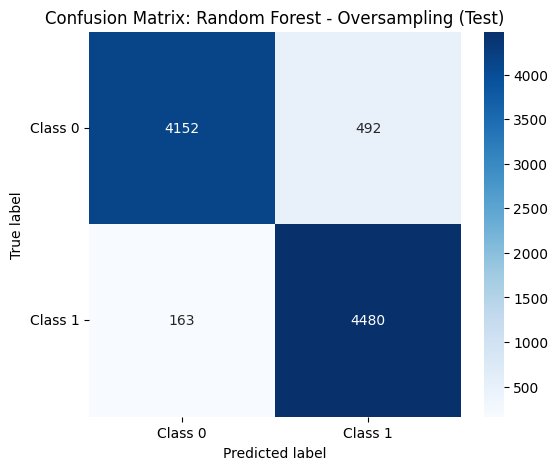


Train Confusion Matrix:
[[18556    16]
 [    3 18570]]

Train Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     18572
           1       1.00      1.00      1.00     18573

    accuracy                           1.00     37145
   macro avg       1.00      1.00      1.00     37145
weighted avg       1.00      1.00      1.00     37145



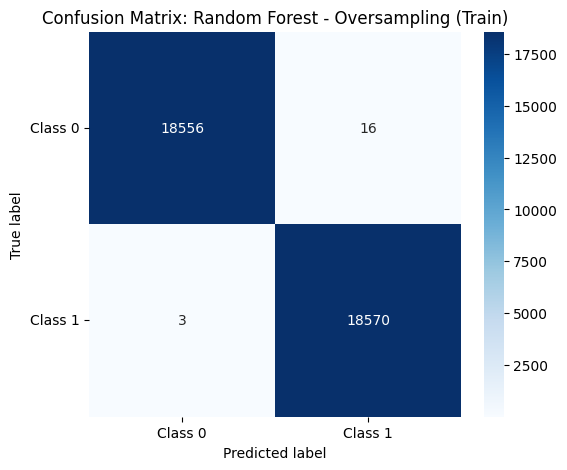

--------------------------------------------------
Training Random Forest with SMOTE...
Model saved as /Users/manhth1nh/iCloud Drive (Archive)/Desktop/University/Machine-learning - midterm/Lưu model/Random Forest_SMOTE_model.pkl
Best parameters: {'class_weight': 'balanced', 'max_depth': None, 'min_samples_split': 2, 'n_estimators': 100}
Best CV score: 0.8320
Test metrics:
Accuracy: 0.8473
F1 Score: 0.8446
Precision: 0.8597
Recall: 0.8301
ROC AUC: 0.9191
Train metrics:
Accuracy: 0.9993
F1 Score: 0.9993
Precision: 0.9990
Recall: 0.9995
ROC AUC: 1.0000

Test Confusion Matrix:
[[4015  629]
 [ 789 3854]]

Test Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.86      0.85      4644
           1       0.86      0.83      0.84      4643

    accuracy                           0.85      9287
   macro avg       0.85      0.85      0.85      9287
weighted avg       0.85      0.85      0.85      9287



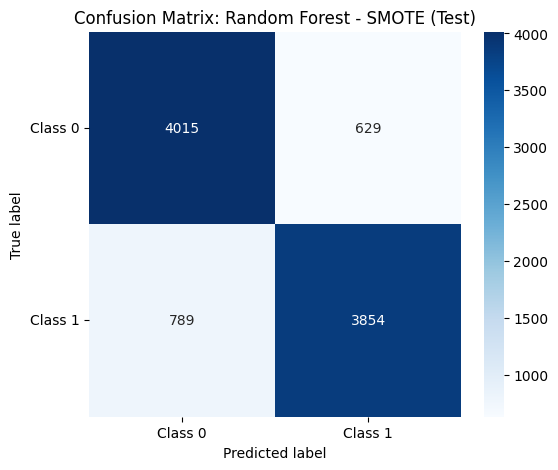


Train Confusion Matrix:
[[18554    18]
 [    9 18564]]

Train Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     18572
           1       1.00      1.00      1.00     18573

    accuracy                           1.00     37145
   macro avg       1.00      1.00      1.00     37145
weighted avg       1.00      1.00      1.00     37145



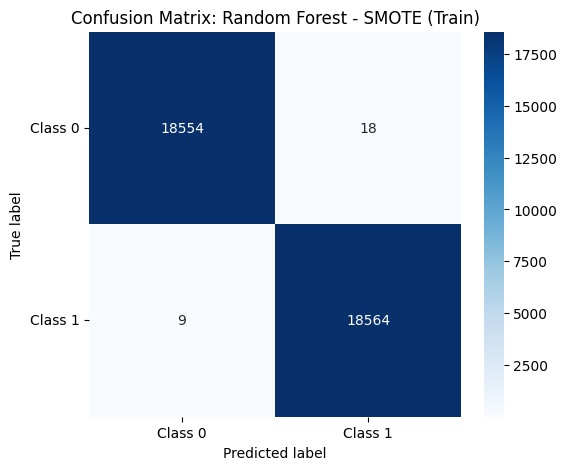

--------------------------------------------------

Training KNN...
Training KNN with Oversampling...
Model saved as /Users/manhth1nh/iCloud Drive (Archive)/Desktop/University/Machine-learning - midterm/Lưu model/KNN_Oversampling_model.pkl
Best parameters: {'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'distance'}
Best CV score: 0.8215
Test metrics:
Accuracy: 0.8174
F1 Score: 0.8411
Precision: 0.7442
Recall: 0.9670
ROC AUC: 0.9057
Train metrics:
Accuracy: 0.9995
F1 Score: 0.9995
Precision: 0.9992
Recall: 0.9998
ROC AUC: 0.9998

Test Confusion Matrix:
[[3101 1543]
 [ 153 4490]]

Test Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.67      0.79      4644
           1       0.74      0.97      0.84      4643

    accuracy                           0.82      9287
   macro avg       0.85      0.82      0.81      9287
weighted avg       0.85      0.82      0.81      9287



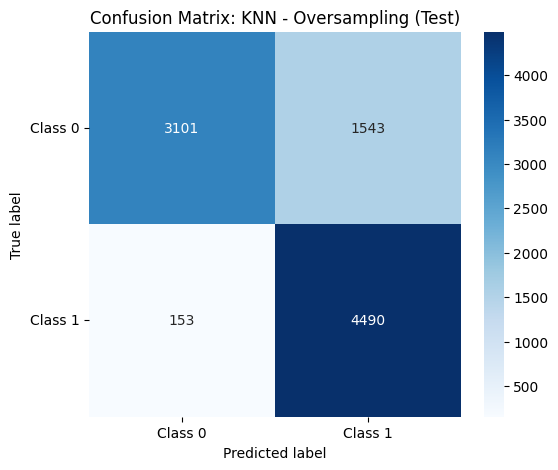


Train Confusion Matrix:
[[18557    15]
 [    4 18569]]

Train Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     18572
           1       1.00      1.00      1.00     18573

    accuracy                           1.00     37145
   macro avg       1.00      1.00      1.00     37145
weighted avg       1.00      1.00      1.00     37145



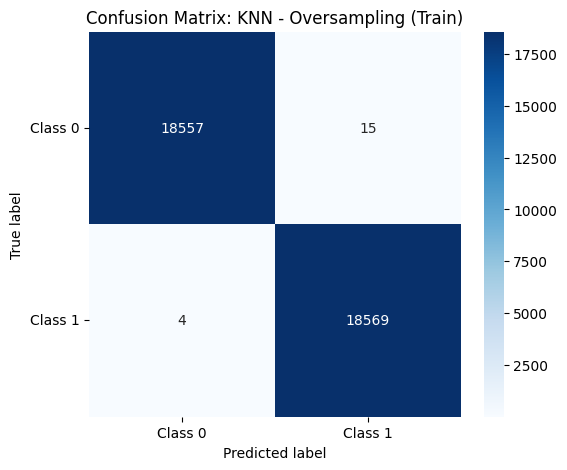

--------------------------------------------------
Training KNN with SMOTE...
Model saved as /Users/manhth1nh/iCloud Drive (Archive)/Desktop/University/Machine-learning - midterm/Lưu model/KNN_SMOTE_model.pkl
Best parameters: {'metric': 'manhattan', 'n_neighbors': 3, 'weights': 'distance'}
Best CV score: 0.7998
Test metrics:
Accuracy: 0.7902
F1 Score: 0.8150
Precision: 0.7289
Recall: 0.9242
ROC AUC: 0.8789
Train metrics:
Accuracy: 0.9993
F1 Score: 0.9993
Precision: 0.9995
Recall: 0.9991
ROC AUC: 1.0000

Test Confusion Matrix:
[[3048 1596]
 [ 352 4291]]

Test Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.66      0.76      4644
           1       0.73      0.92      0.82      4643

    accuracy                           0.79      9287
   macro avg       0.81      0.79      0.79      9287
weighted avg       0.81      0.79      0.79      9287



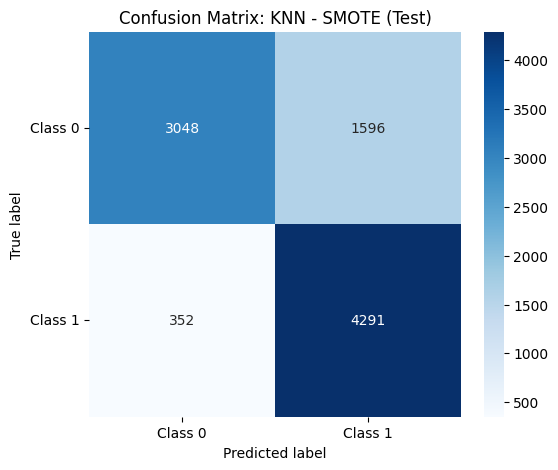


Train Confusion Matrix:
[[18562    10]
 [   17 18556]]

Train Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     18572
           1       1.00      1.00      1.00     18573

    accuracy                           1.00     37145
   macro avg       1.00      1.00      1.00     37145
weighted avg       1.00      1.00      1.00     37145



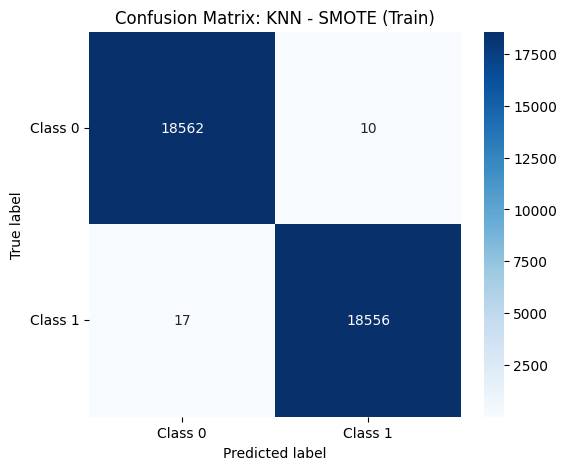

--------------------------------------------------

Training XGBoost...
Training XGBoost with Oversampling...
Model saved as /Users/manhth1nh/iCloud Drive (Archive)/Desktop/University/Machine-learning - midterm/Lưu model/XGBoost_Oversampling_model.pkl
Best parameters: {'learning_rate': 0.1, 'max_depth': 7, 'min_child_weight': 1, 'n_estimators': 100, 'scale_pos_weight': 3}
Best CV score: 0.7719
Test metrics:
Accuracy: 0.7199
F1 Score: 0.7739
Precision: 0.6488
Recall: 0.9589
ROC AUC: 0.8636
Train metrics:
Accuracy: 0.7611
F1 Score: 0.8041
Precision: 0.6814
Recall: 0.9807
ROC AUC: 0.9171

Test Confusion Matrix:
[[2234 2410]
 [ 191 4452]]

Test Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.48      0.63      4644
           1       0.65      0.96      0.77      4643

    accuracy                           0.72      9287
   macro avg       0.79      0.72      0.70      9287
weighted avg       0.79      0.72      0.70      9287



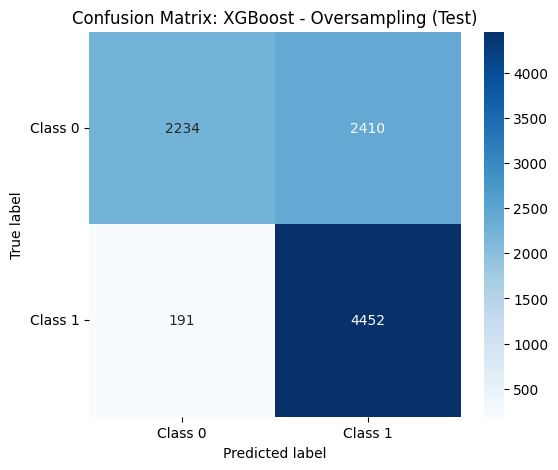


Train Confusion Matrix:
[[10057  8515]
 [  359 18214]]

Train Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.54      0.69     18572
           1       0.68      0.98      0.80     18573

    accuracy                           0.76     37145
   macro avg       0.82      0.76      0.75     37145
weighted avg       0.82      0.76      0.75     37145



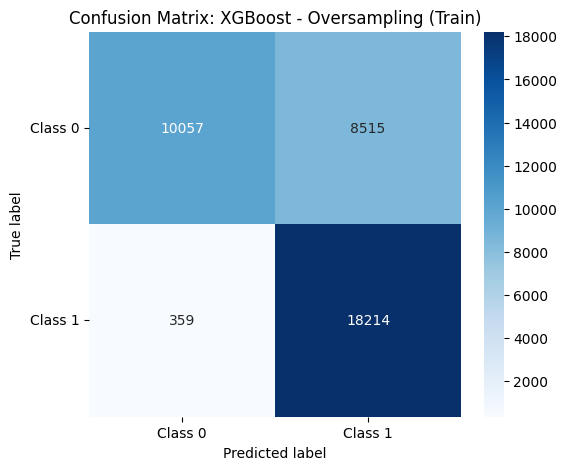

--------------------------------------------------
Training XGBoost with SMOTE...
Model saved as /Users/manhth1nh/iCloud Drive (Archive)/Desktop/University/Machine-learning - midterm/Lưu model/XGBoost_SMOTE_model.pkl
Best parameters: {'learning_rate': 0.1, 'max_depth': 7, 'min_child_weight': 1, 'n_estimators': 100, 'scale_pos_weight': 1}
Best CV score: 0.8062
Test metrics:
Accuracy: 0.8169
F1 Score: 0.8118
Precision: 0.8351
Recall: 0.7898
ROC AUC: 0.8979
Train metrics:
Accuracy: 0.8658
F1 Score: 0.8618
Precision: 0.8885
Recall: 0.8366
ROC AUC: 0.9449

Test Confusion Matrix:
[[3920  724]
 [ 976 3667]]

Test Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.84      0.82      4644
           1       0.84      0.79      0.81      4643

    accuracy                           0.82      9287
   macro avg       0.82      0.82      0.82      9287
weighted avg       0.82      0.82      0.82      9287



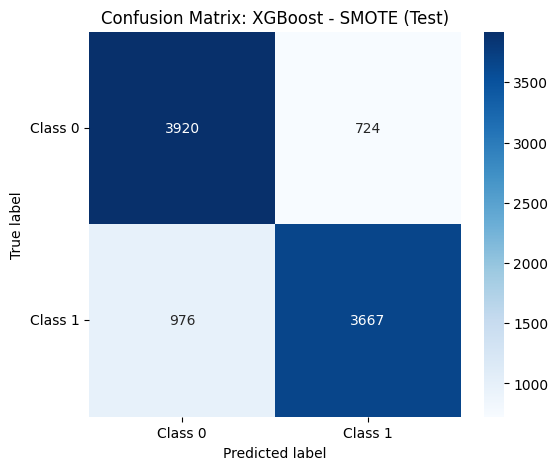


Train Confusion Matrix:
[[16623  1949]
 [ 3035 15538]]

Train Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.90      0.87     18572
           1       0.89      0.84      0.86     18573

    accuracy                           0.87     37145
   macro avg       0.87      0.87      0.87     37145
weighted avg       0.87      0.87      0.87     37145



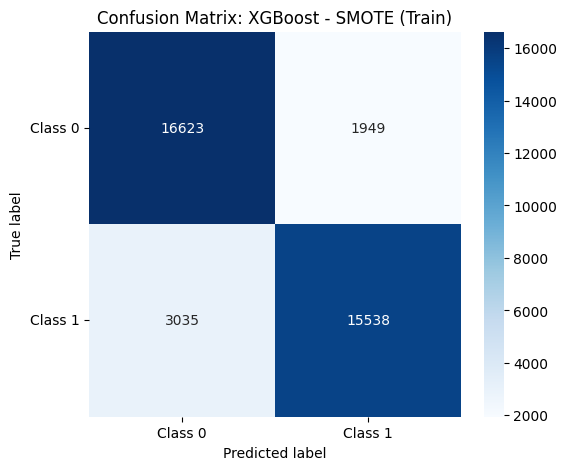

--------------------------------------------------


In [61]:
# 6. Train và đánh giá tất cả các mô hình
all_results = {}
for model_name, (model, param_grid) in models.items():
    print(f"\nTraining {model_name}...")
    print("=" * 50)
    results = train_evaluate_model(
        model, param_grid,
        X_train_dict, y_train_dict,
        X_test_dict, y_test_dict,
        model_name
    )
    all_results[model_name] = results

In [62]:
def create_summary_dataframe(all_results):
    # Khởi tạo danh sách các hàng dữ liệu để lưu trữ kết quả tổng hợp
    rows = []
    # Lặp qua từng mô hình và phương pháp resampling
    for model_name, results in all_results.items():
        for sampling_method, result in results.items():
            # Lấy các chỉ số đánh giá (metrics) từ kết quả
            metrics = result['metrics']
            
            # Tạo hàng mới với các chỉ số đánh giá
            row = {
                'Model': model_name,
                'Sampling': sampling_method,
                'Accuracy': metrics['Accuracy'],
                'F1 Score': metrics['F1 Score'],
                'Precision': metrics['Precision'],
                'Recall': metrics['Recall'],
                'ROC AUC': metrics['ROC AUC']
            }
            rows.append(row)  # Thêm hàng vào danh sách
    
    # Chuyển danh sách thành DataFrame và sắp xếp theo 'Model' và 'Sampling'
    df = pd.DataFrame(rows)
    return df.sort_values(['Model', 'Sampling'])


In [63]:
# 8. In kết quả và tham số tối ưu
print("\nKết quả chi tiết:")
results_df = create_summary_dataframe(all_results)
print(results_df.round(4))
print("\nTham số tối ưu cho mỗi mô hình:")
for model_name, results in all_results.items():
    print(f"\n{model_name}:")
    for sampling_method, result in results.items():
        print(f"{sampling_method}:")
        print(f"Best parameters: {result['best_params']}")
        print(f"Best CV score: {result['best_score']:.4f}")


Kết quả chi tiết:
                 Model      Sampling  Accuracy  F1 Score  Precision  Recall  \
4                  KNN  Oversampling    0.8174    0.8411     0.7442  0.9670   
5                  KNN         SMOTE    0.7902    0.8150     0.7289  0.9242   
0  Logistic Regression  Oversampling    0.6713    0.6607     0.6825  0.6403   
1  Logistic Regression         SMOTE    0.7254    0.7262     0.7241  0.7282   
2        Random Forest  Oversampling    0.9295    0.9319     0.9010  0.9649   
3        Random Forest         SMOTE    0.8473    0.8446     0.8597  0.8301   
6              XGBoost  Oversampling    0.7199    0.7739     0.6488  0.9589   
7              XGBoost         SMOTE    0.8169    0.8118     0.8351  0.7898   

   ROC AUC  
4   0.9057  
5   0.8789  
0   0.7196  
1   0.7916  
2   0.9787  
3   0.9191  
6   0.8636  
7   0.8979  

Tham số tối ưu cho mỗi mô hình:

Logistic Regression:
Oversampling:
Best parameters: {'C': 1, 'class_weight': 'balanced', 'penalty': 'l1', 'solver': 'l

# THỰC HIỆN TRỰC QUAN HOÁ CÁC METRICS CỦA MÔ HÌNH

In [105]:
import pandas as pd

def create_average_metrics_table(all_results):
    # Khởi tạo một từ điển để lưu trữ tổng và số lượng để tính trung bình
    metrics_sums = {}
    
    # Lặp qua các kết quả để tính tổng các chỉ số
    for model_name, results in all_results.items():
        for sampling_method, result in results.items():
            # Lấy các chỉ số
            metrics = result['metrics']
            
            # Khởi tạo chỉ số trong từ điển tổng nếu chưa có
            if sampling_method not in metrics_sums:
                metrics_sums[sampling_method] = {metric: 0 for metric in metrics.keys()}
                metrics_sums[sampling_method]['count'] = 0
            
            # Tính tổng các chỉ số
            for metric, value in metrics.items():
                metrics_sums[sampling_method][metric] += value
            
            # Tăng số lượng để tính trung bình
            metrics_sums[sampling_method]['count'] += 1
    
    # Tạo một DataFrame để lưu trữ các chỉ số trung bình
    average_metrics = []
    for sampling_method, sums in metrics_sums.items():
        avg_metrics = {metric: sums[metric] / sums['count'] for metric in sums if metric != 'count'}
        avg_metrics['Sampling'] = sampling_method
        average_metrics.append(avg_metrics)

    # Chuyển đổi danh sách thành DataFrame
    average_metrics_df = pd.DataFrame(average_metrics)

    # Sắp xếp lại các cột để dễ đọc hơn
    average_metrics_df = average_metrics_df[['Sampling', 'Accuracy', 'F1 Score', 'Precision', 'Recall', 'ROC AUC']]
    
    return average_metrics_df

# Tạo bảng tóm tắt
average_metrics_table = create_average_metrics_table(all_results)

# Hiển thị bảng các chỉ số trung bình
average_metrics_table


,Sampling,Accuracy,F1 Score,Precision,Recall,ROC AUC
0,Oversampling,0.784511,0.801920,0.744146,0.882781,0.866894
1,SMOTE,0.794982,0.799402,0.786960,0.818059,0.871854


In [106]:
import pandas as pd

def create_model_metrics_tables(all_results):
    # Khởi tạo một từ điển để lưu trữ các chỉ số cho từng phương pháp lấy mẫu
    metrics_by_sampling = {}
    
    # Lặp qua các kết quả để thu thập các chỉ số
    for model_name, results in all_results.items():
        for sampling_method, result in results.items():
            # Lấy các chỉ số
            metrics = result['metrics']
            
            # Khởi tạo phương pháp lấy mẫu nếu chưa có
            if sampling_method not in metrics_by_sampling:
                metrics_by_sampling[sampling_method] = []
            
            # Thêm các chỉ số của mô hình vào phương pháp lấy mẫu tương ứng
            metrics_row = {
                'Model': model_name,
                'Accuracy': metrics['Accuracy'],
                'F1 Score': metrics['F1 Score'],
                'Precision': metrics['Precision'],
                'Recall': metrics['Recall'],
                'ROC AUC': metrics['ROC AUC']
            }
            metrics_by_sampling[sampling_method].append(metrics_row)
    
    # Tạo một DataFrame cho mỗi phương pháp lấy mẫu
    metrics_tables = {}
    for sampling_method, metrics_rows in metrics_by_sampling.items():
        metrics_tables[sampling_method] = pd.DataFrame(metrics_rows)

    return metrics_tables

# Tạo bảng các chỉ số cho từng phương pháp lấy mẫu
metrics_tables = create_model_metrics_tables(all_results)

# Hiển thị bảng các chỉ số
for sampling_method, table in metrics_tables.items():
    print(f"\nChỉ số cho Phương Pháp Lấy Mẫu {sampling_method}:")
    print(table)



Chỉ số cho Phương Pháp Lấy Mẫu Oversampling:
                 Model  Accuracy  F1 Score  Precision    Recall   ROC AUC
0  Logistic Regression  0.671261  0.660740   0.682507  0.640319  0.719572
1        Random Forest  0.929471  0.931877   0.901046  0.964893  0.978747
2                  KNN  0.817379  0.841139   0.744240  0.967047  0.905702
3              XGBoost  0.719931  0.773924   0.648790  0.958863  0.863557

Chỉ số cho Phương Pháp Lấy Mẫu SMOTE:
                 Model  Accuracy  F1 Score  Precision    Recall   ROC AUC
0  Logistic Regression  0.725423  0.726160   0.724138  0.728193  0.791567
1        Random Forest  0.847313  0.844620   0.859692  0.830067  0.919060
2                  KNN  0.790244  0.815005   0.728894  0.924187  0.878923
3              XGBoost  0.816948  0.811822   0.835117  0.789791  0.897867


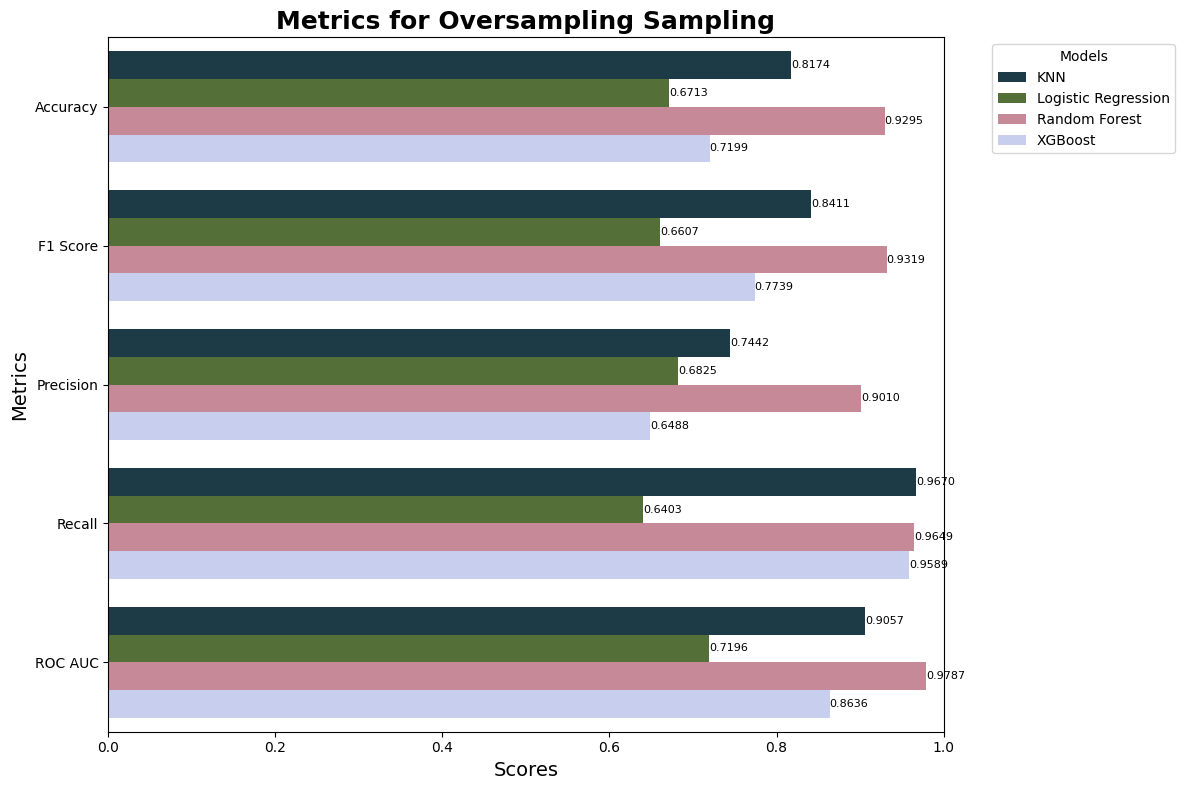

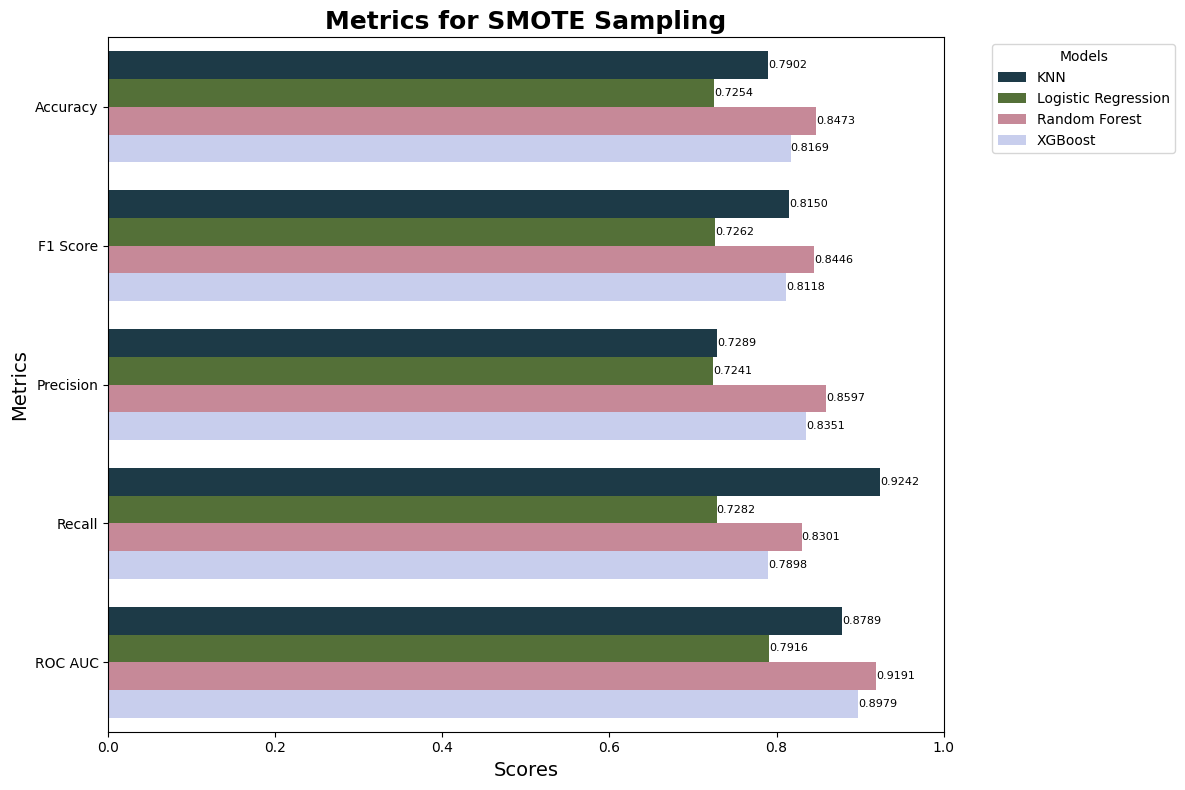

In [93]:
# Lặp qua từng phương pháp sampling và vẽ biểu đồ riêng
sampling_methods = results_df['Sampling'].unique()
metrics = ['Accuracy', 'F1 Score', 'Precision', 'Recall', 'ROC AUC']

for sampling in sampling_methods:
    # Lọc dữ liệu theo phương pháp sampling
    df_sampling = results_df[results_df['Sampling'] == sampling]
    
    # Chuyển đổi dữ liệu từ dạng rộng sang dài
    df_melted = df_sampling.melt(id_vars=['Model'], value_vars=metrics, 
                                 var_name='Metric', value_name='Value')
    
    # Thiết lập kích thước biểu đồ riêng cho mỗi phương pháp sampling
    plt.figure(figsize=(12, 8))
    
    # Vẽ biểu đồ
    barplot = sns.barplot(data=df_melted, x='Value', y='Metric', hue='Model', palette='cubehelix', ci=None)
    
    # Thiết lập tiêu đề và giới hạn trục
    plt.title(f'Metrics for {sampling} Sampling', fontsize=18, fontweight='bold')
    plt.xlim(0, 1)
    plt.xlabel('Scores', fontsize=14)
    plt.ylabel('Metrics', fontsize=14)
    plt.legend(title='Models', bbox_to_anchor=(1.05, 1), loc='upper left')
    
    for p in barplot.patches:
        value = p.get_width()
        if value != 0.00:  # Kiểm tra nếu giá trị khác 0.00 mới vẽ chú thích
            barplot.annotate(f'{value:.4f}',  # Giá trị cho từng cột
                             (value, p.get_y() + p.get_height() / 2),  # Vị trí của giá trị
                             ha='left', va='center',  # Căn chỉnh vị trí
                             color='black', fontsize=8)  # Định dạng giá trị

    # Hiển thị biểu đồ
    plt.tight_layout()
    plt.show()

# chọn ra mô hình chạy rốt nhất trong tập

In [98]:
# Định nghĩa chỉ số để tối ưu hóa
metric_to_optimize = 'ROC AUC'  # Thay đổi thành 'Accuracy', 'F1 Score', v.v., nếu cần

# Khởi tạo các biến để theo dõi mô hình tốt nhất
best_model_name = None
best_score = -np.inf  # Bắt đầu với giá trị thấp nhất có thể để tối đa hóa
best_results = None

# Lặp qua tất cả các kết quả để tìm mô hình tốt nhất dựa trên chỉ số đã chọn
for model_name, results in all_results.items():
    for sampling_method, result in results.items():
        score = result['metrics'][metric_to_optimize]  # Lấy điểm số cho chỉ số đã chọn
        print(f"{model_name} ({sampling_method}) - {metric_to_optimize}: {score:.4f}")
        
        if score > best_score:  # So sánh và chọn mô hình tốt nhất
            best_score = score
            best_model_name = model_name
            best_results = result

# Xuất mô hình tốt nhất và điểm số của nó
print(f"\nMô hình tốt nhất: {best_model_name} với {metric_to_optimize}: {best_score:.4f}")


Logistic Regression (Oversampling) - ROC AUC: 0.7196
Logistic Regression (SMOTE) - ROC AUC: 0.7916
Random Forest (Oversampling) - ROC AUC: 0.9787
Random Forest (SMOTE) - ROC AUC: 0.9191
KNN (Oversampling) - ROC AUC: 0.9057
KNN (SMOTE) - ROC AUC: 0.8789
XGBoost (Oversampling) - ROC AUC: 0.8636
XGBoost (SMOTE) - ROC AUC: 0.8979

Mô hình tốt nhất: Random Forest với ROC AUC: 0.9787


In [90]:
#random forest
best_model, best_param_grid = models[best_model_name]
final_model = GridSearchCV(best_model, best_param_grid, scoring='roc_auc', cv=5)  # Change scoring if needed
final_model.fit(X_train_dict[sampling_method], y_train_dict[sampling_method])  # Use the best sampling method


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'class_weight': ['balanced', None],
                         'max_depth': [10, 20, None],
                         'min_samples_split': [2, 5], 'n_estimators': [100]},
             scoring='roc_auc')

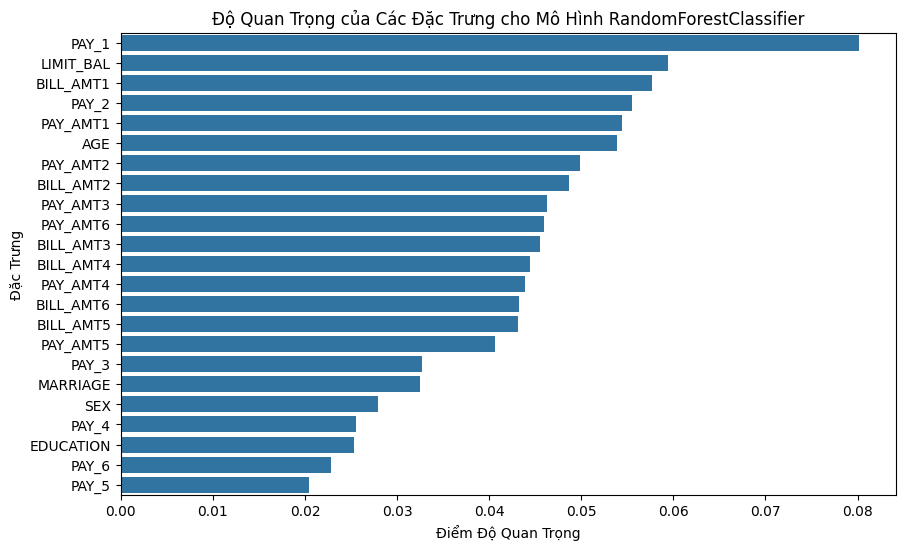

In [107]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def plot_feature_importance(model, feature_names):
    # Kiểm tra xem mô hình có thuộc tính độ quan trọng của đặc trưng hay không
    if hasattr(model, 'feature_importances_'):
        importances = model.feature_importances_
    elif hasattr(model, 'coef_'):
        importances = np.abs(model.coef_[0])  # Đối với hồi quy logistic
    else:
        print(f"Mô hình {model} không cung cấp độ quan trọng của đặc trưng.")
        return
    
    # Tạo DataFrame cho độ quan trọng của các đặc trưng
    feature_importance_df = pd.DataFrame({
        'Feature': feature_names,
        'Importance': importances
    })
    
    # Sắp xếp theo độ quan trọng
    feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

    # Vẽ biểu đồ
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
    plt.title(f'Độ Quan Trọng của Các Đặc Trưng cho Mô Hình {model.__class__.__name__}')
    plt.xlabel('Điểm Độ Quan Trọng')
    plt.ylabel('Đặc Trưng')
    plt.show()

feature_names = X_train_dict[sampling_method].columns  # Thay thế sampling_method theo đúng ngữ cảnh

# Gọi hàm để vẽ độ quan trọng của các đặc trưng
plot_feature_importance(final_model.best_estimator_, feature_names)

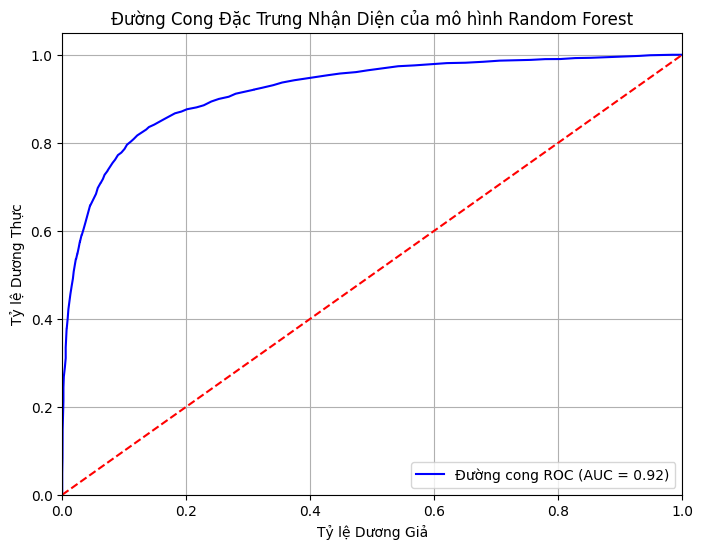

In [109]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

def plot_roc_curve(model, X_test, y_test):
    # Lấy xác suất dự đoán
    y_pred_proba = model.predict_proba(X_test)[:, 1]  # Lấy xác suất cho lớp dương

    # Tính toán đường cong ROC
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
    
    # Tính toán AUC
    roc_auc = auc(fpr, tpr)

    # Vẽ đường cong ROC
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='blue', label=f'Đường cong ROC (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Đường chéo
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('Tỷ lệ Dương Giả')
    plt.ylabel('Tỷ lệ Dương Thực')
    plt.title('Đường Cong Đặc Trưng Nhận Diện của mô hình Random Forest')
    plt.legend(loc='lower right')
    plt.grid()
    plt.show()

# Gọi hàm để vẽ đường cong ROC sử dụng mô hình tốt nhất và dữ liệu kiểm tra
plot_roc_curve(final_model.best_estimator_, X_test_dict[sampling_method], y_test_dict[sampling_method])  # Thay thế sampling_method theo đúng ngữ cảnh
